In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import calendar
from load_data import load_data

In [2]:
labels_mibici_3 = np.load('vector_files/kernel_kmeans_results/labels_mibici_3_2.npy')
dates_mibici_3 = np.load('vector_files/kernel_kmeans_results/dates_mibici_2022.npy')

In [3]:
def plot_calendar_clusters_np(date_array, label_array, year, cmap='tab10'):
    dates = pd.to_datetime(date_array, format='%Y-%m-%d')
    labels = np.array(label_array)

    if len(dates) != len(labels):
        raise ValueError("Las fechas y las etiquetas deben tener la misma longitud.")

    sorted_indices = np.argsort(dates)
    dates = dates[sorted_indices]
    labels = labels[sorted_indices]

    df = pd.DataFrame({'fecha': dates, 'clúster': labels})
    df = df[df['fecha'].dt.year == year].copy()

    fig, axs = plt.subplots(3, 4, figsize=(20, 12))
    fig.suptitle(f'Calendario {year} - Días coloreados por clúster', fontsize=18)

    unique_labels = sorted(df['clúster'].unique())
    cmap = plt.get_cmap(cmap)
    color_dict = {label: cmap(i % 10) for i, label in enumerate(unique_labels)}

    dias_semana = ['D', 'L', 'M', 'M', 'J', 'V', 'S']

    for month in range(1, 13):
        ax = axs[(month - 1) // 4, (month - 1) % 4]
        ax.set_title(calendar.month_name[month].capitalize(), fontsize=14)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlim(-0.5, 6.5)
        ax.set_ylim(5.5, -1.5)

        for i, nombre_dia in enumerate(dias_semana):
            ax.text(i, -1, nombre_dia, ha='center', va='center', fontsize=10, weight='bold')

        month_days = calendar.monthrange(year, month)[1]
        first_weekday = (calendar.monthrange(year, month)[0] + 1) % 7  

        for day in range(1, month_days + 1):
            current_date = pd.Timestamp(year, month, day)
            weekday = (current_date.weekday() + 1) % 7  # 0 = domingo
            week_index = ((day + first_weekday - 1) // 7)

            label_row = df[df['fecha'] == current_date]
            color = color_dict[label_row.iloc[0]['clúster']] if not label_row.empty else 'lightgray'

            rect = patches.Rectangle((weekday - 0.5, week_index - 0.5), 1, 1,
                                     edgecolor='black', facecolor=color)
            ax.add_patch(rect)
            ax.text(weekday, week_index, str(day), ha='center', va='center', fontsize=9, color='black')

    handles = [patches.Patch(color=color_dict[lab], label=f'Clúster {lab}') for lab in unique_labels]
    fig.legend(handles=handles, loc='lower center', ncol=len(handles), fontsize=12)
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()


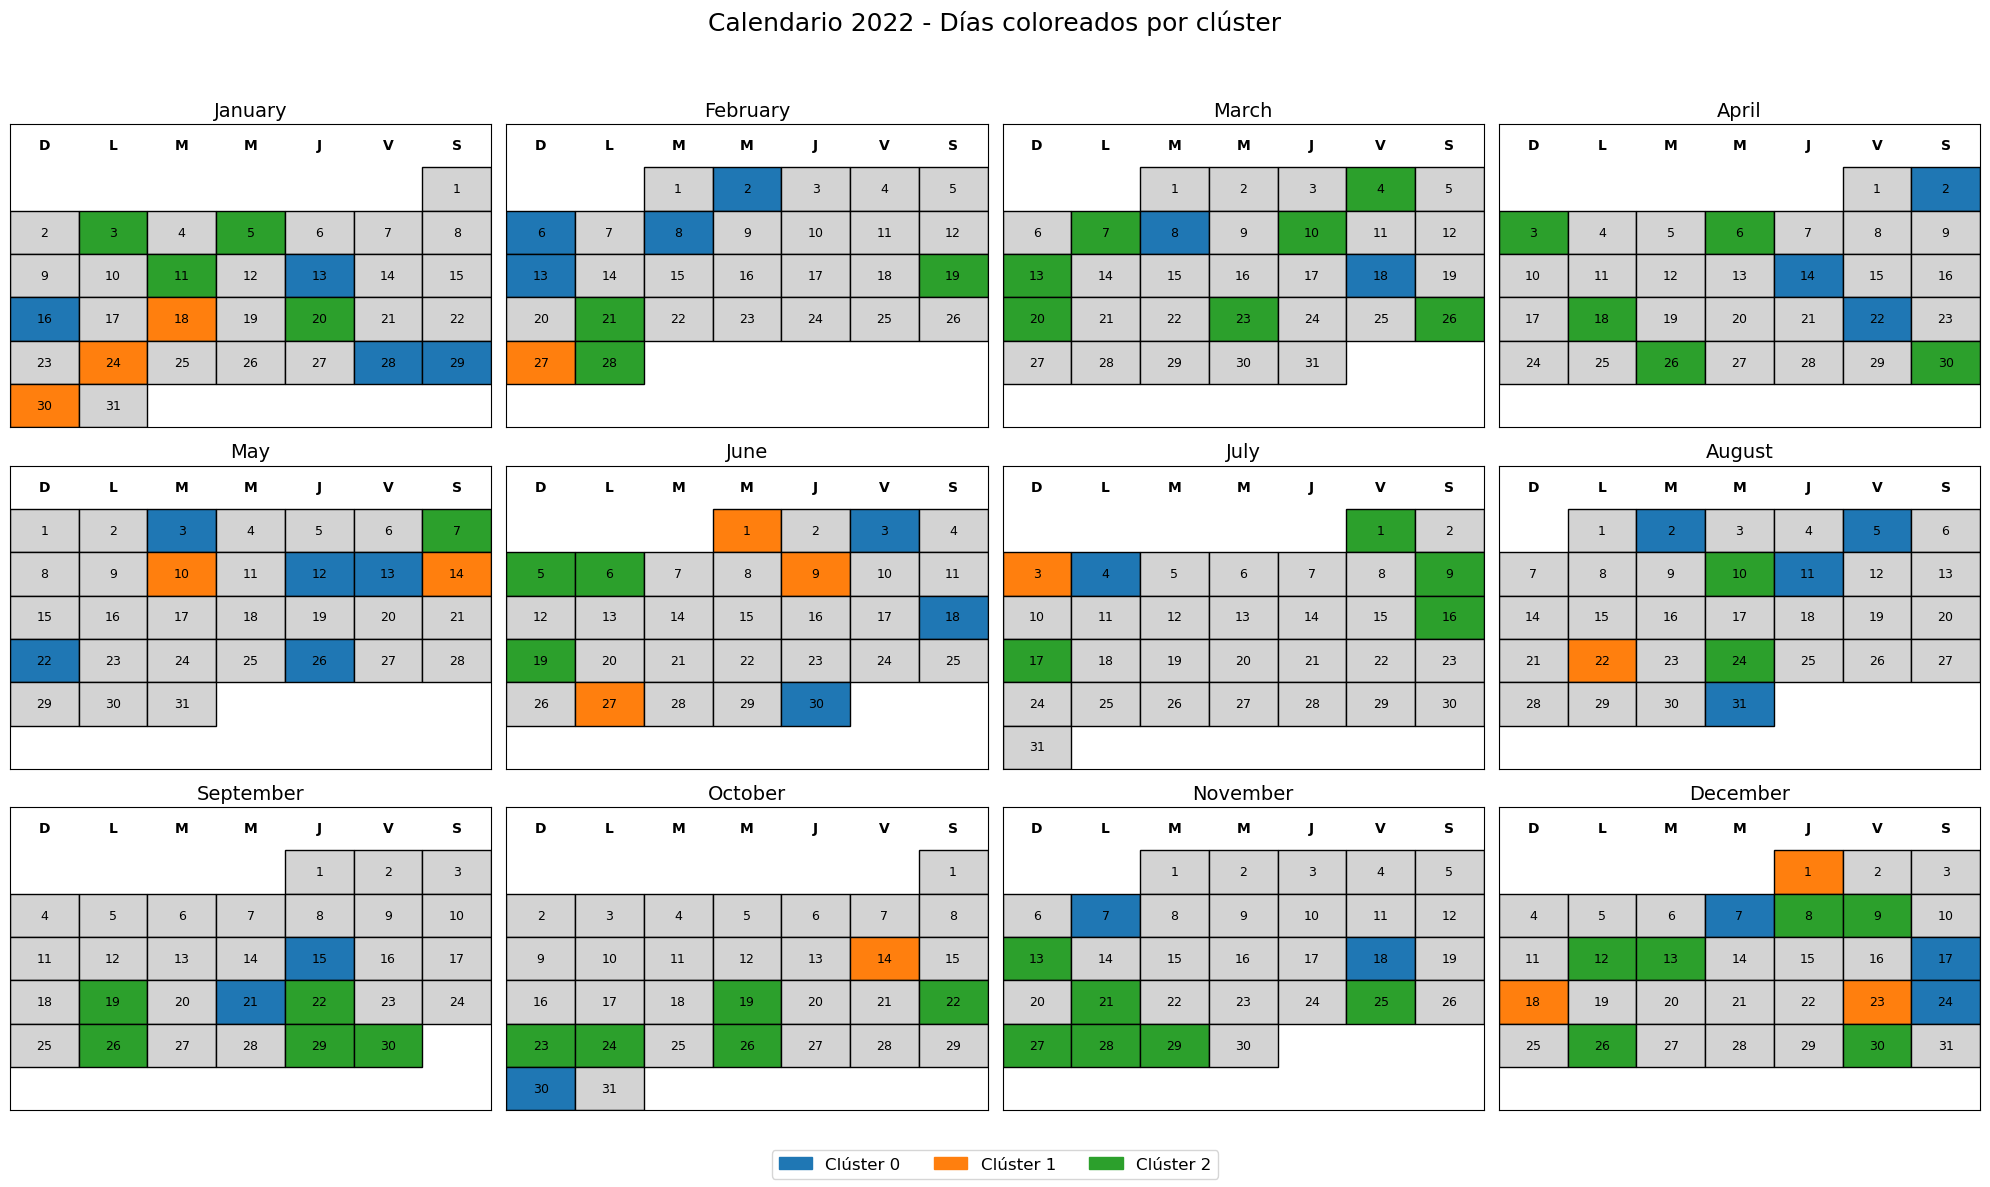

In [4]:
plot_calendar_clusters_np(dates_mibici_3[:100], labels_mibici_3[:100], 2022, cmap='tab10')

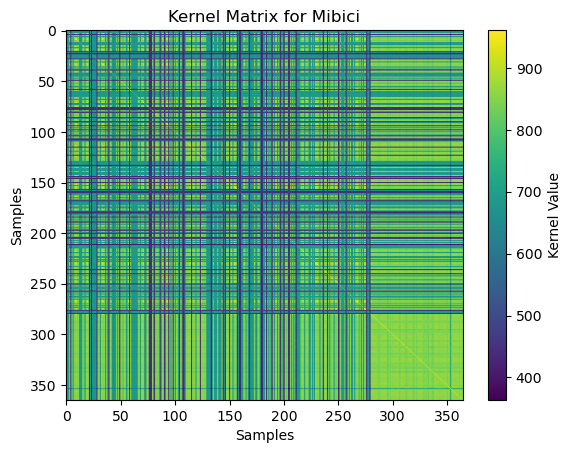

In [5]:
K_mibici = np.load('vector_files/kernel_kmeans_results/kernel_matrix_mibici_2.npy')
#K_mibici = K_mibici[:10, :10]  # Limitar a los primeros 100 elementos para visualización
plt.imshow(K_mibici, cmap='viridis', aspect='auto')
plt.colorbar(label='Kernel Value')
plt.title('Kernel Matrix for Mibici')
plt.xlabel('Samples')
plt.ylabel('Samples')
plt.show()

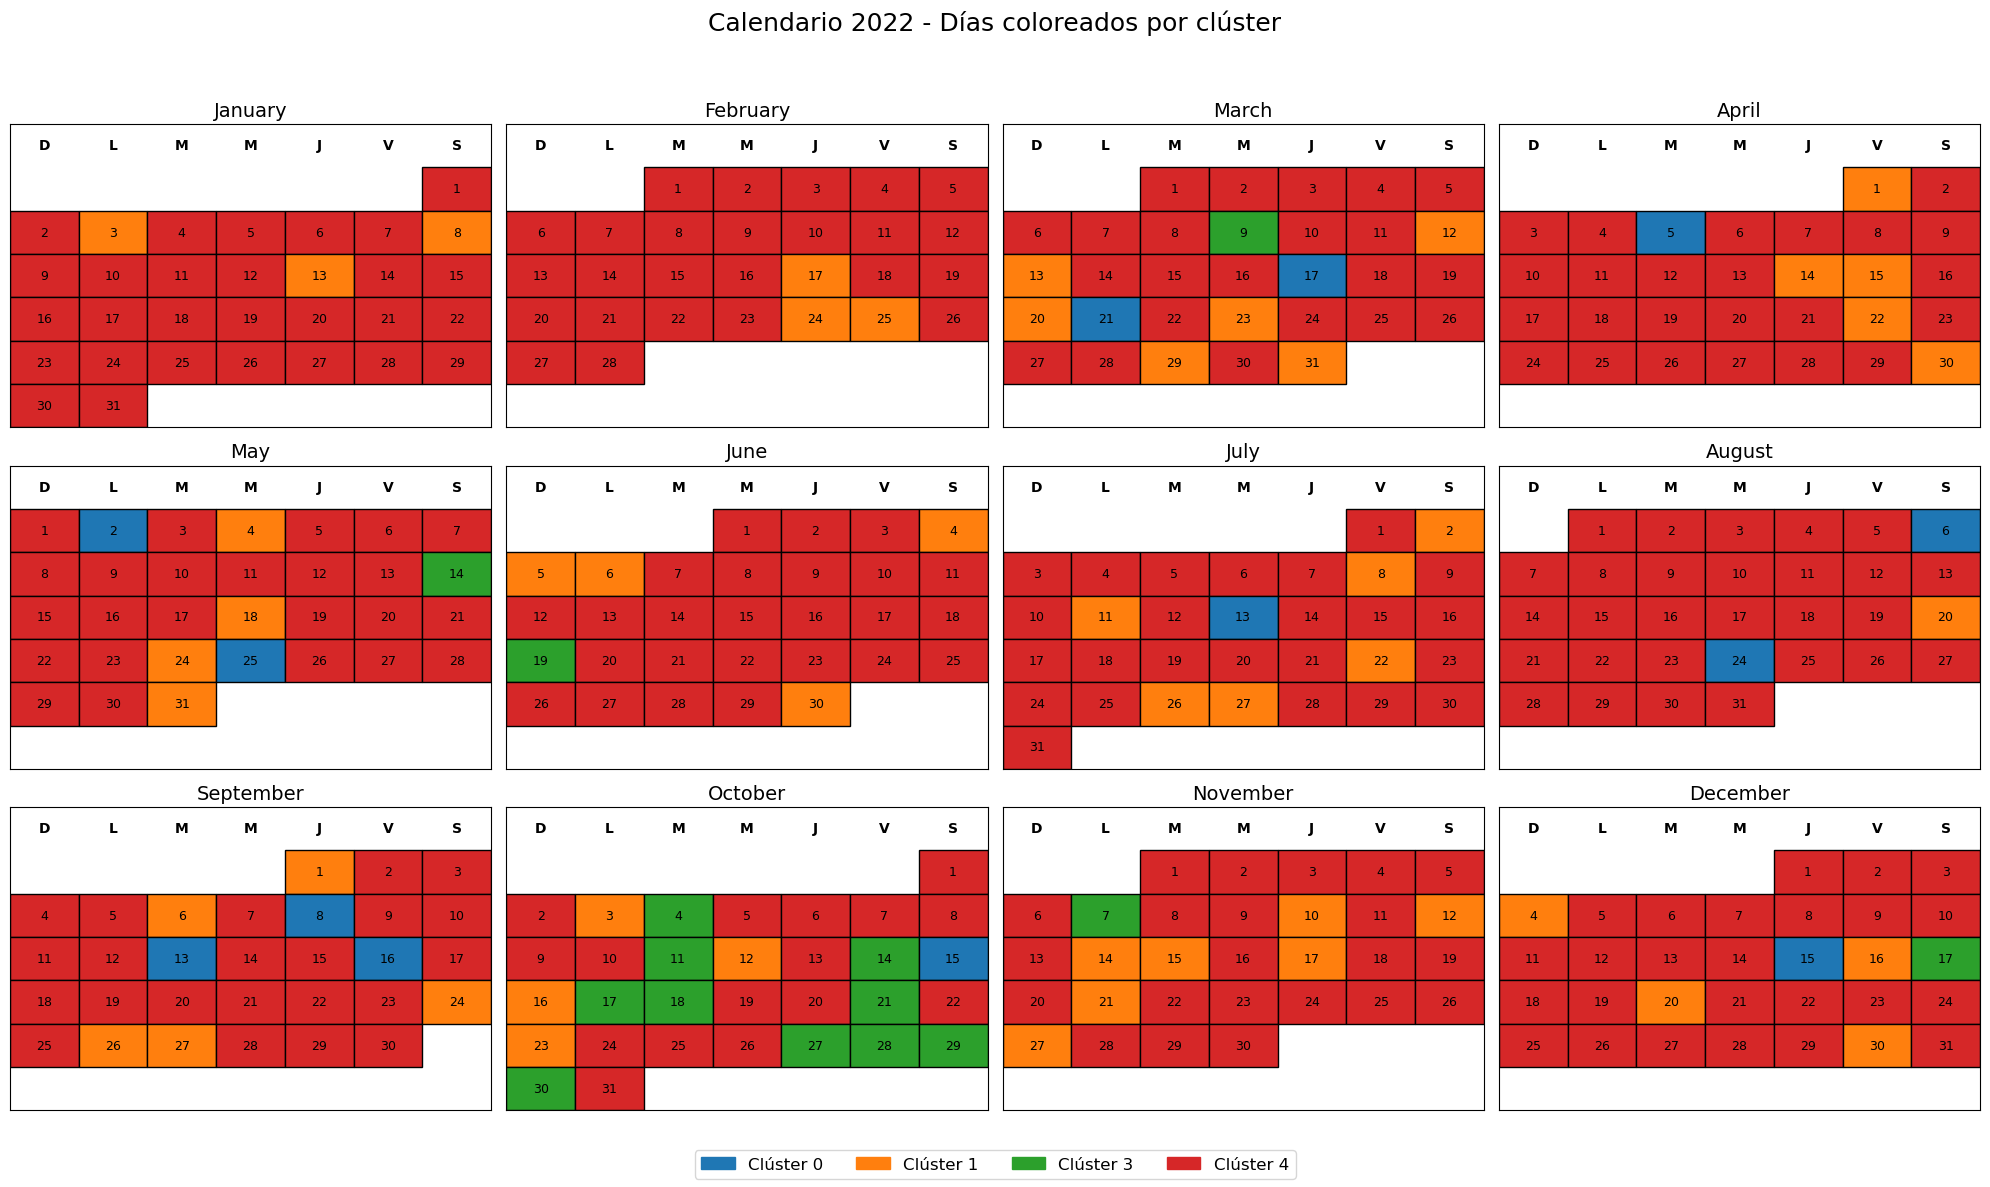

In [6]:
labels_mibici_5 = np.load('vector_files/kernel_kmeans_results/labels_mibici_5.npy')
dates_mibici_8 = np.load('vector_files/kernel_kmeans_results/dates_mibici_2022_8.npy')
plot_calendar_clusters_np(dates_mibici_8, labels_mibici_5, 2022, cmap='tab10')

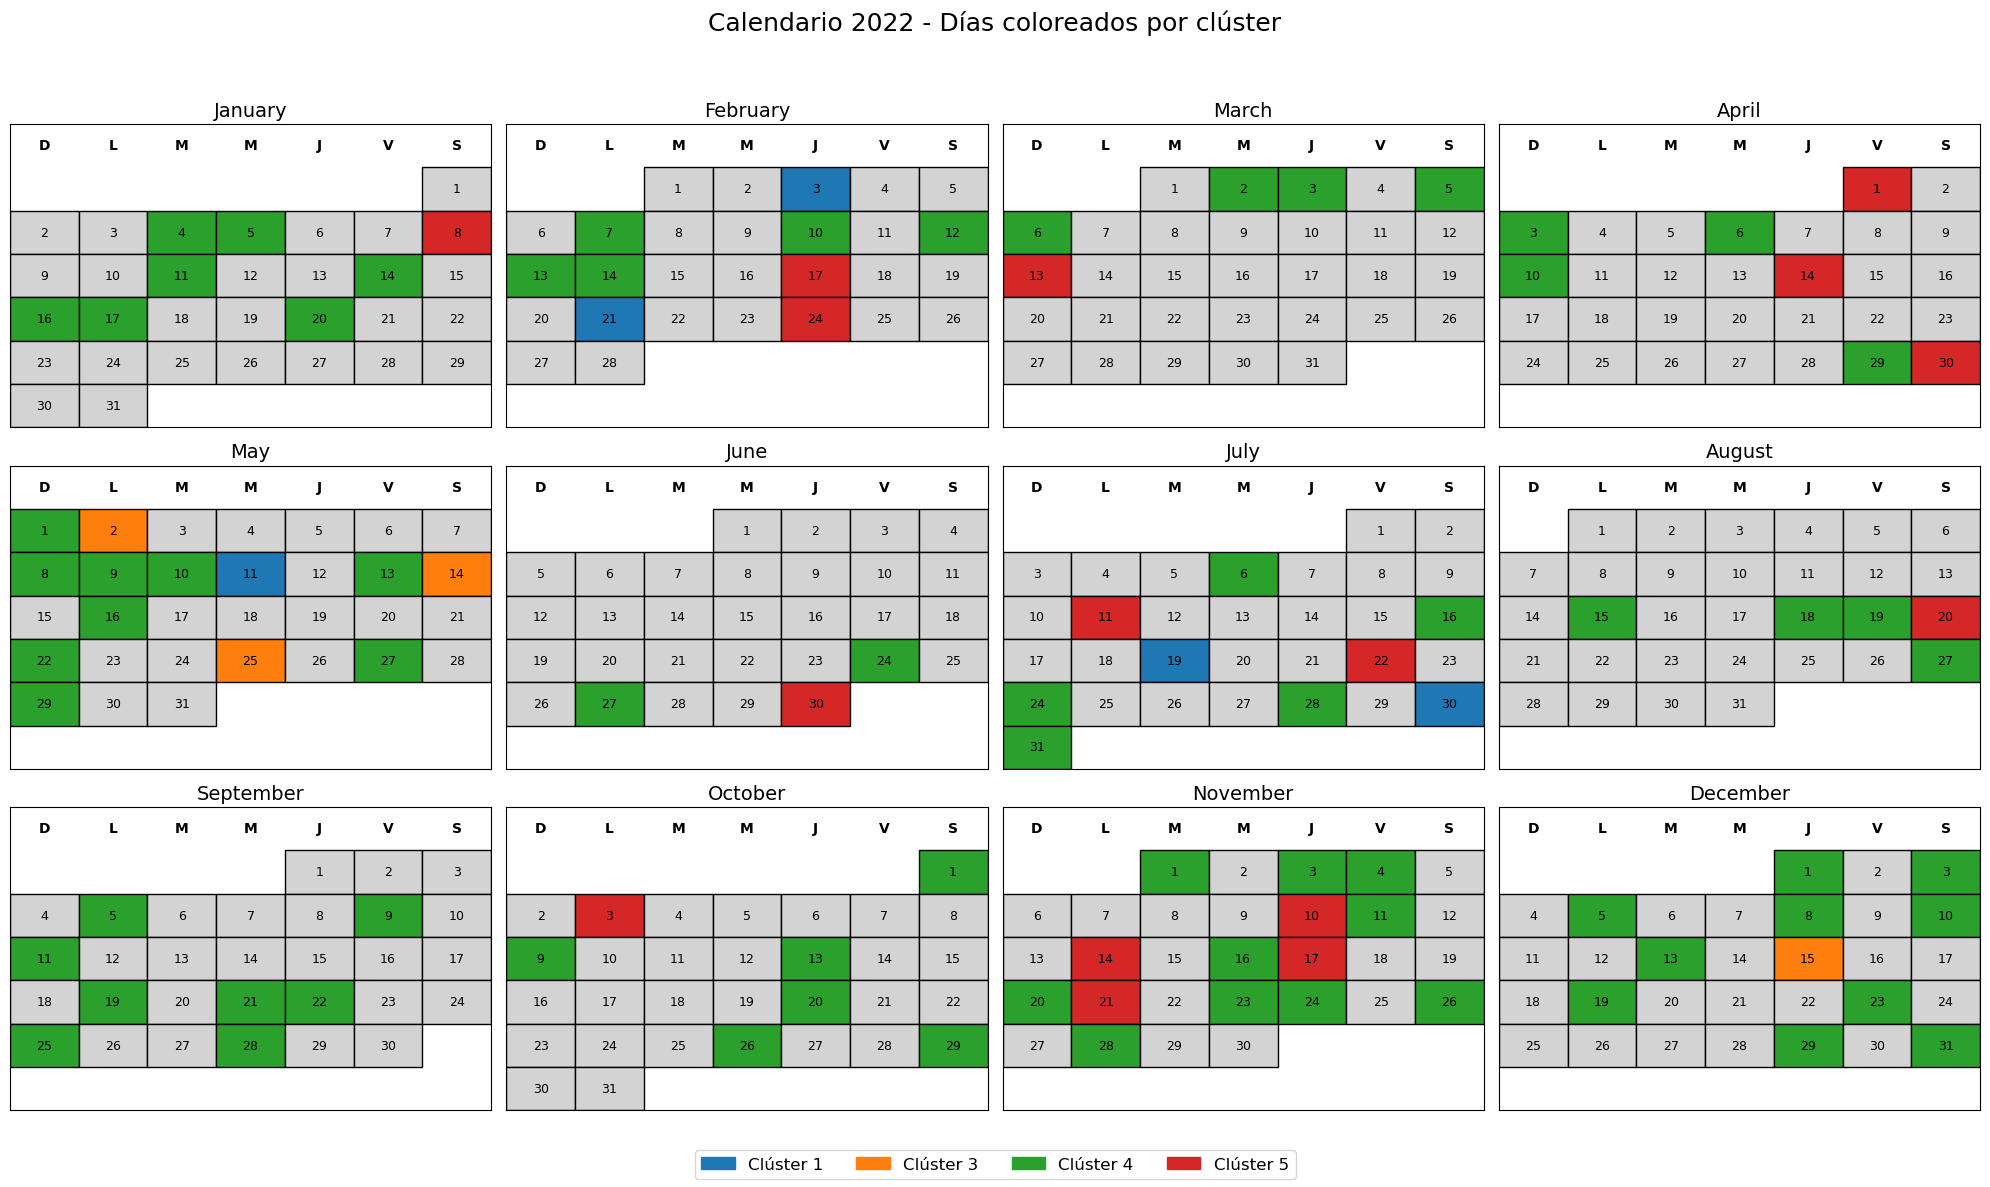

In [7]:
labels_mibici_7 = np.load('vector_files/kernel_kmeans_results/labels_mibici_7.npy')
plot_calendar_clusters_np(dates_mibici_8[:100], labels_mibici_7[:100], 2022, cmap='tab10')

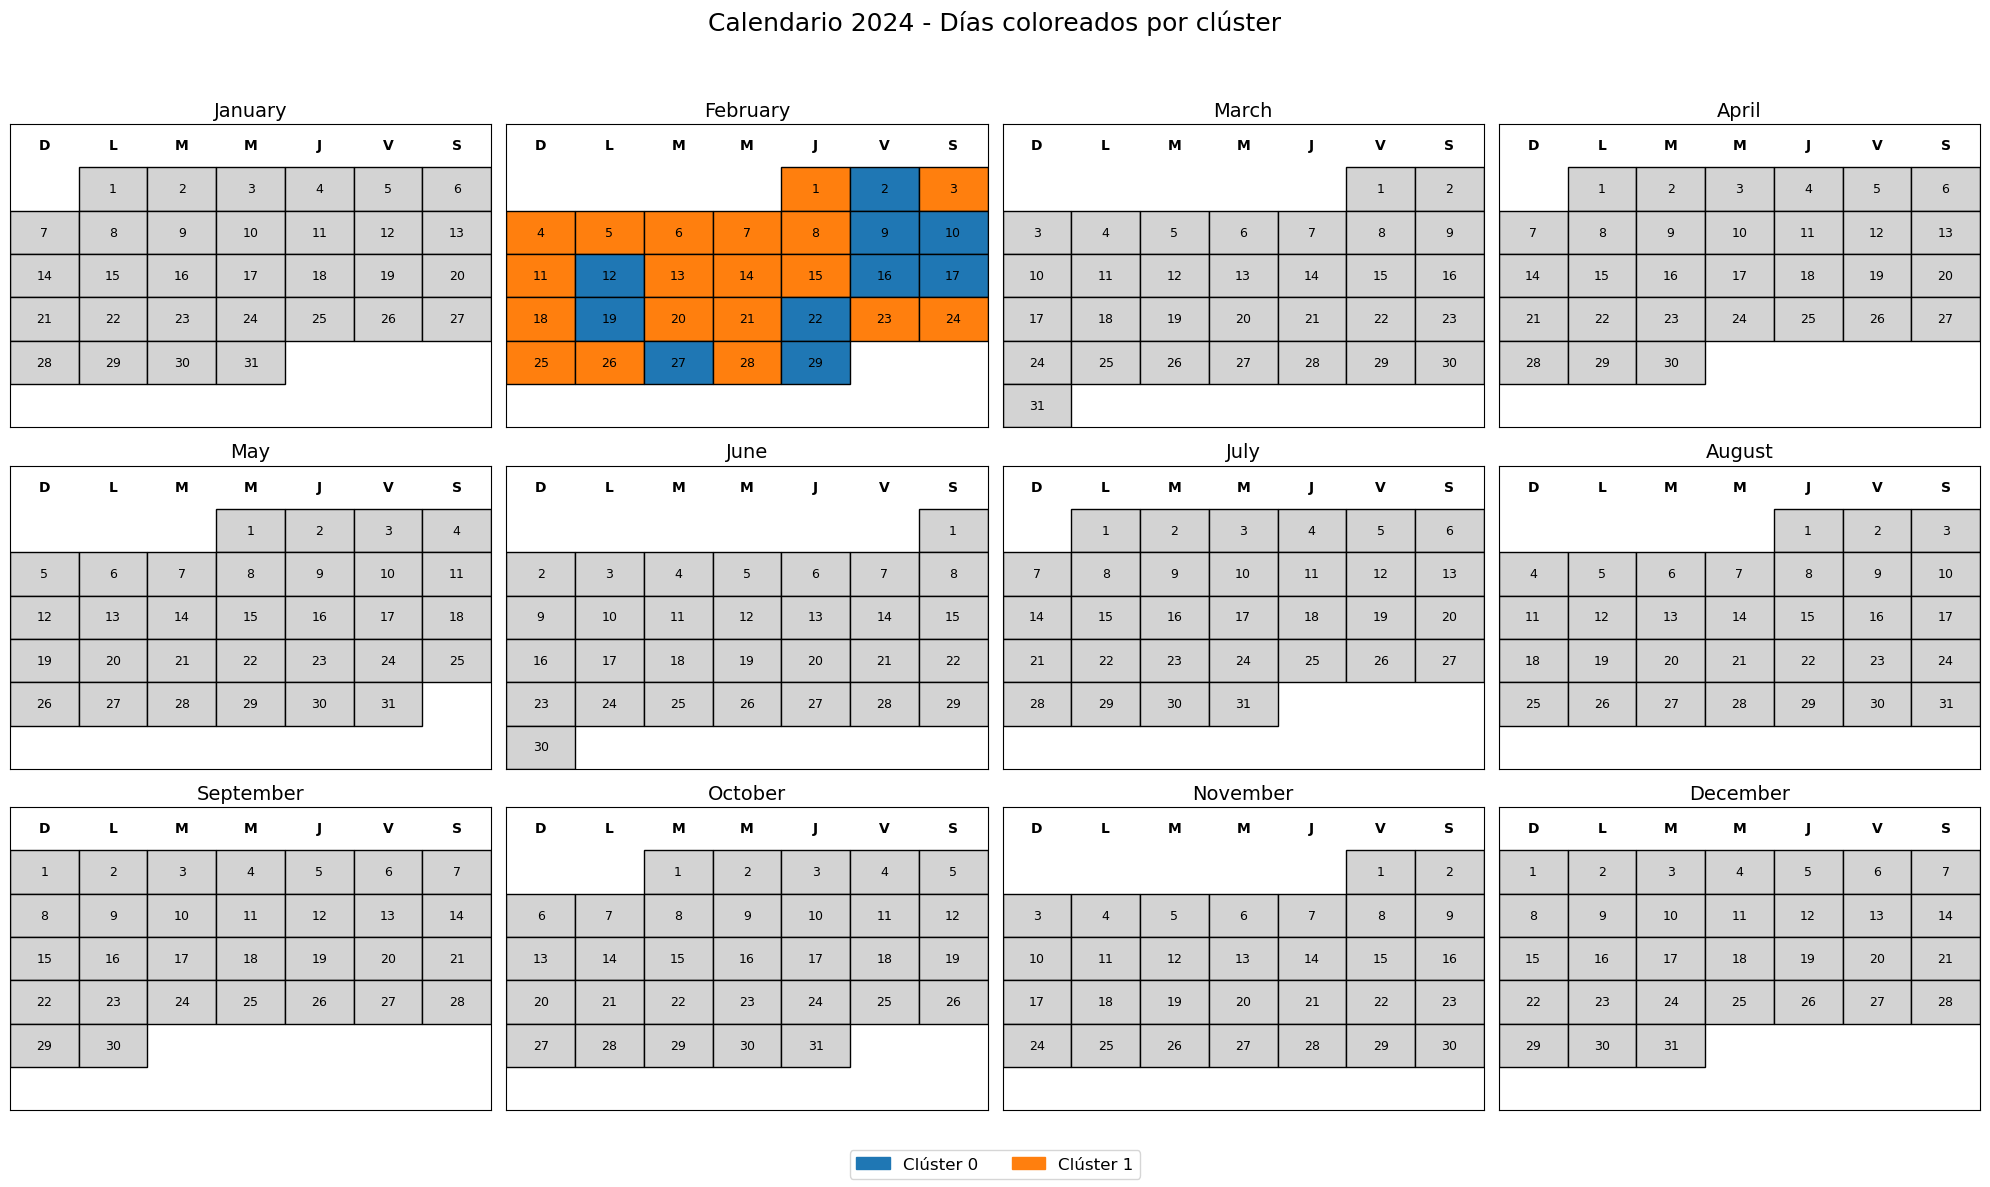

In [8]:
dates_mibici_2024 = np.load('vector_files/kernel_kmeans_results/dates_mibici_2024.npy')
labels_mibici_2024_2 = np.load('vector_files/kernel_kmeans_results/labels_mibici_2024_2.npy')
plot_calendar_clusters_np(dates_mibici_2024, labels_mibici_2024_2, 2024, cmap='tab10')

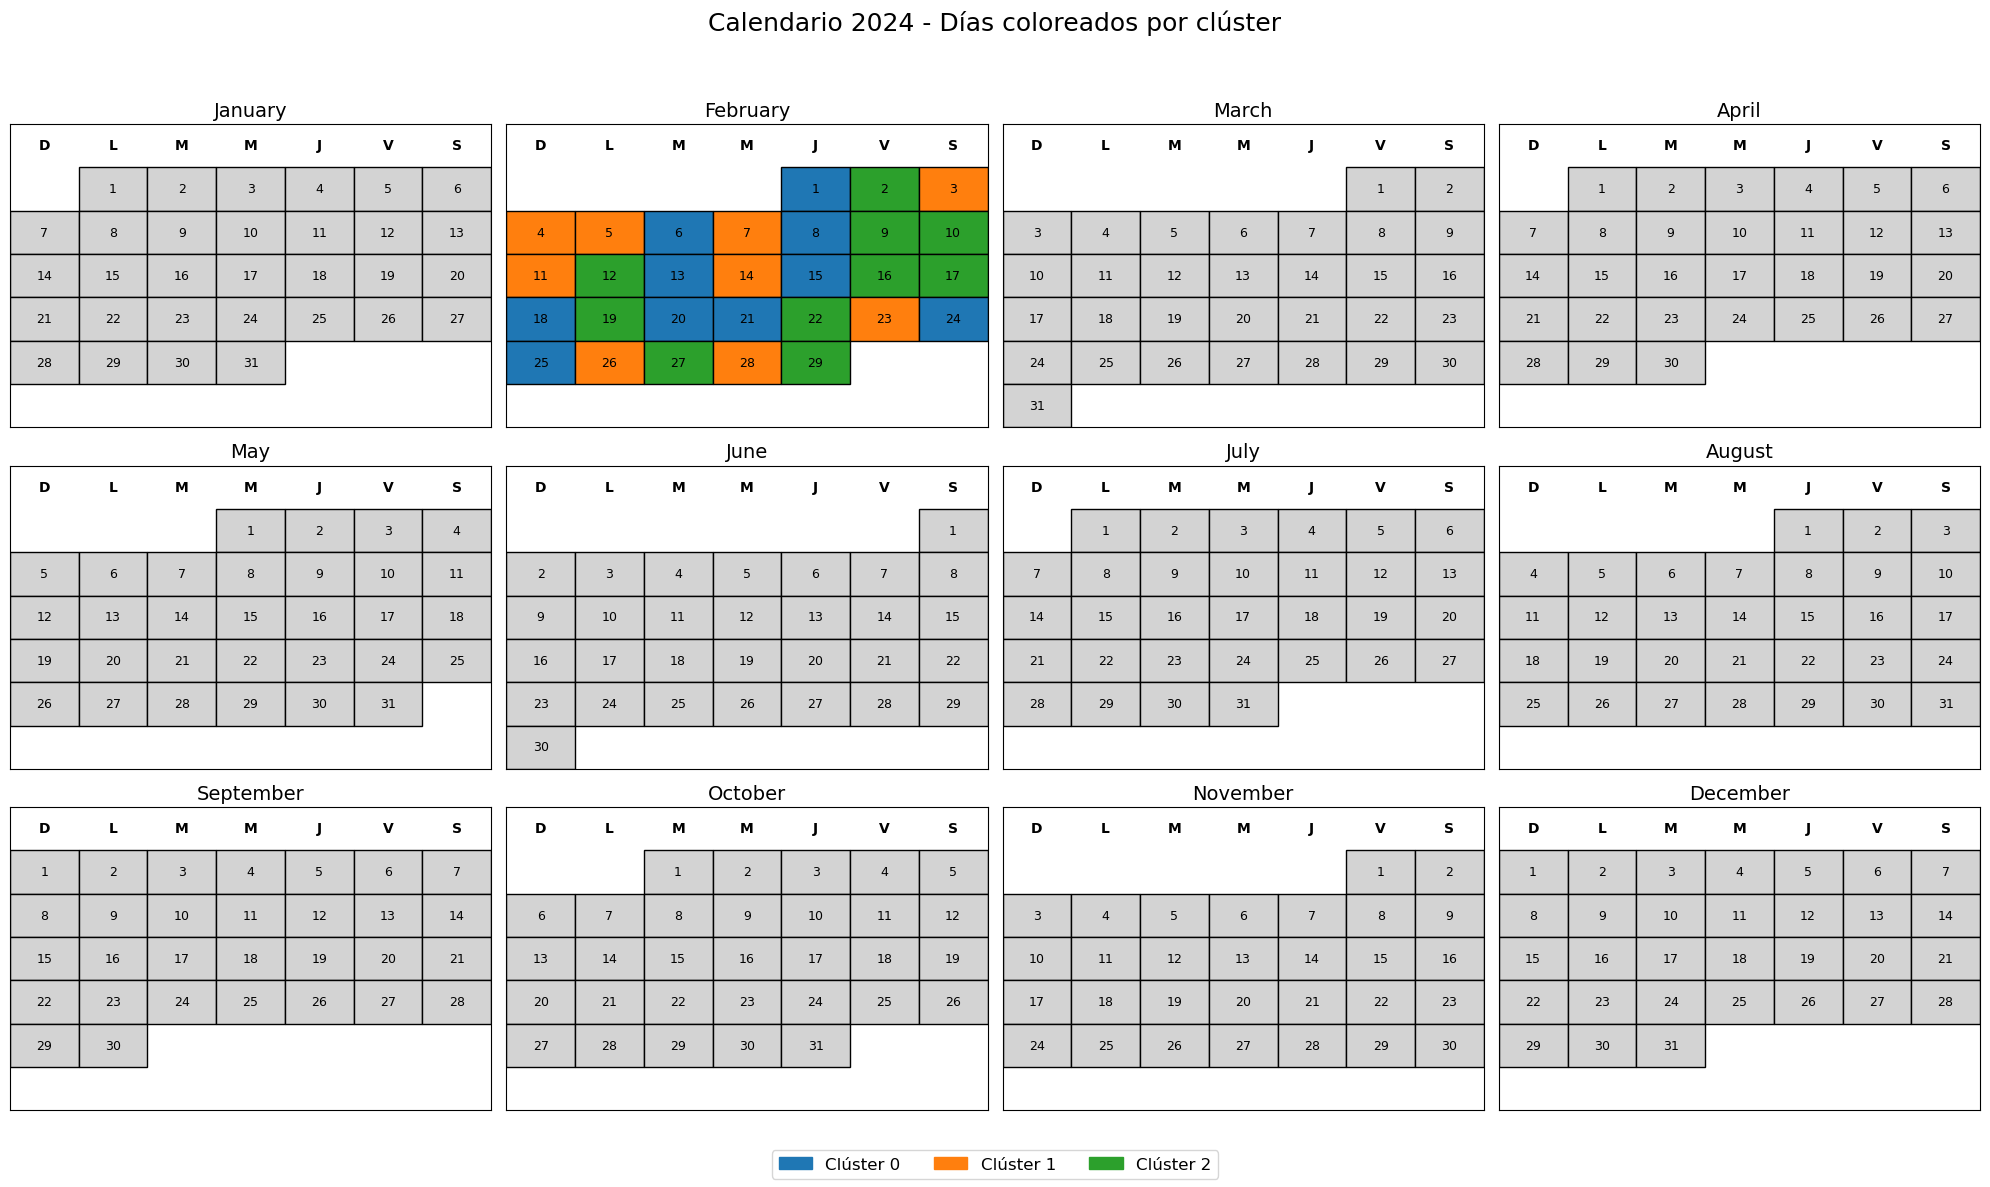

In [9]:
labels_mibici_2024_3 = np.load('vector_files/kernel_kmeans_results/labels_mibici_2024_3.npy')
plot_calendar_clusters_np(dates_mibici_2024, labels_mibici_2024_3, 2024, cmap='tab10')

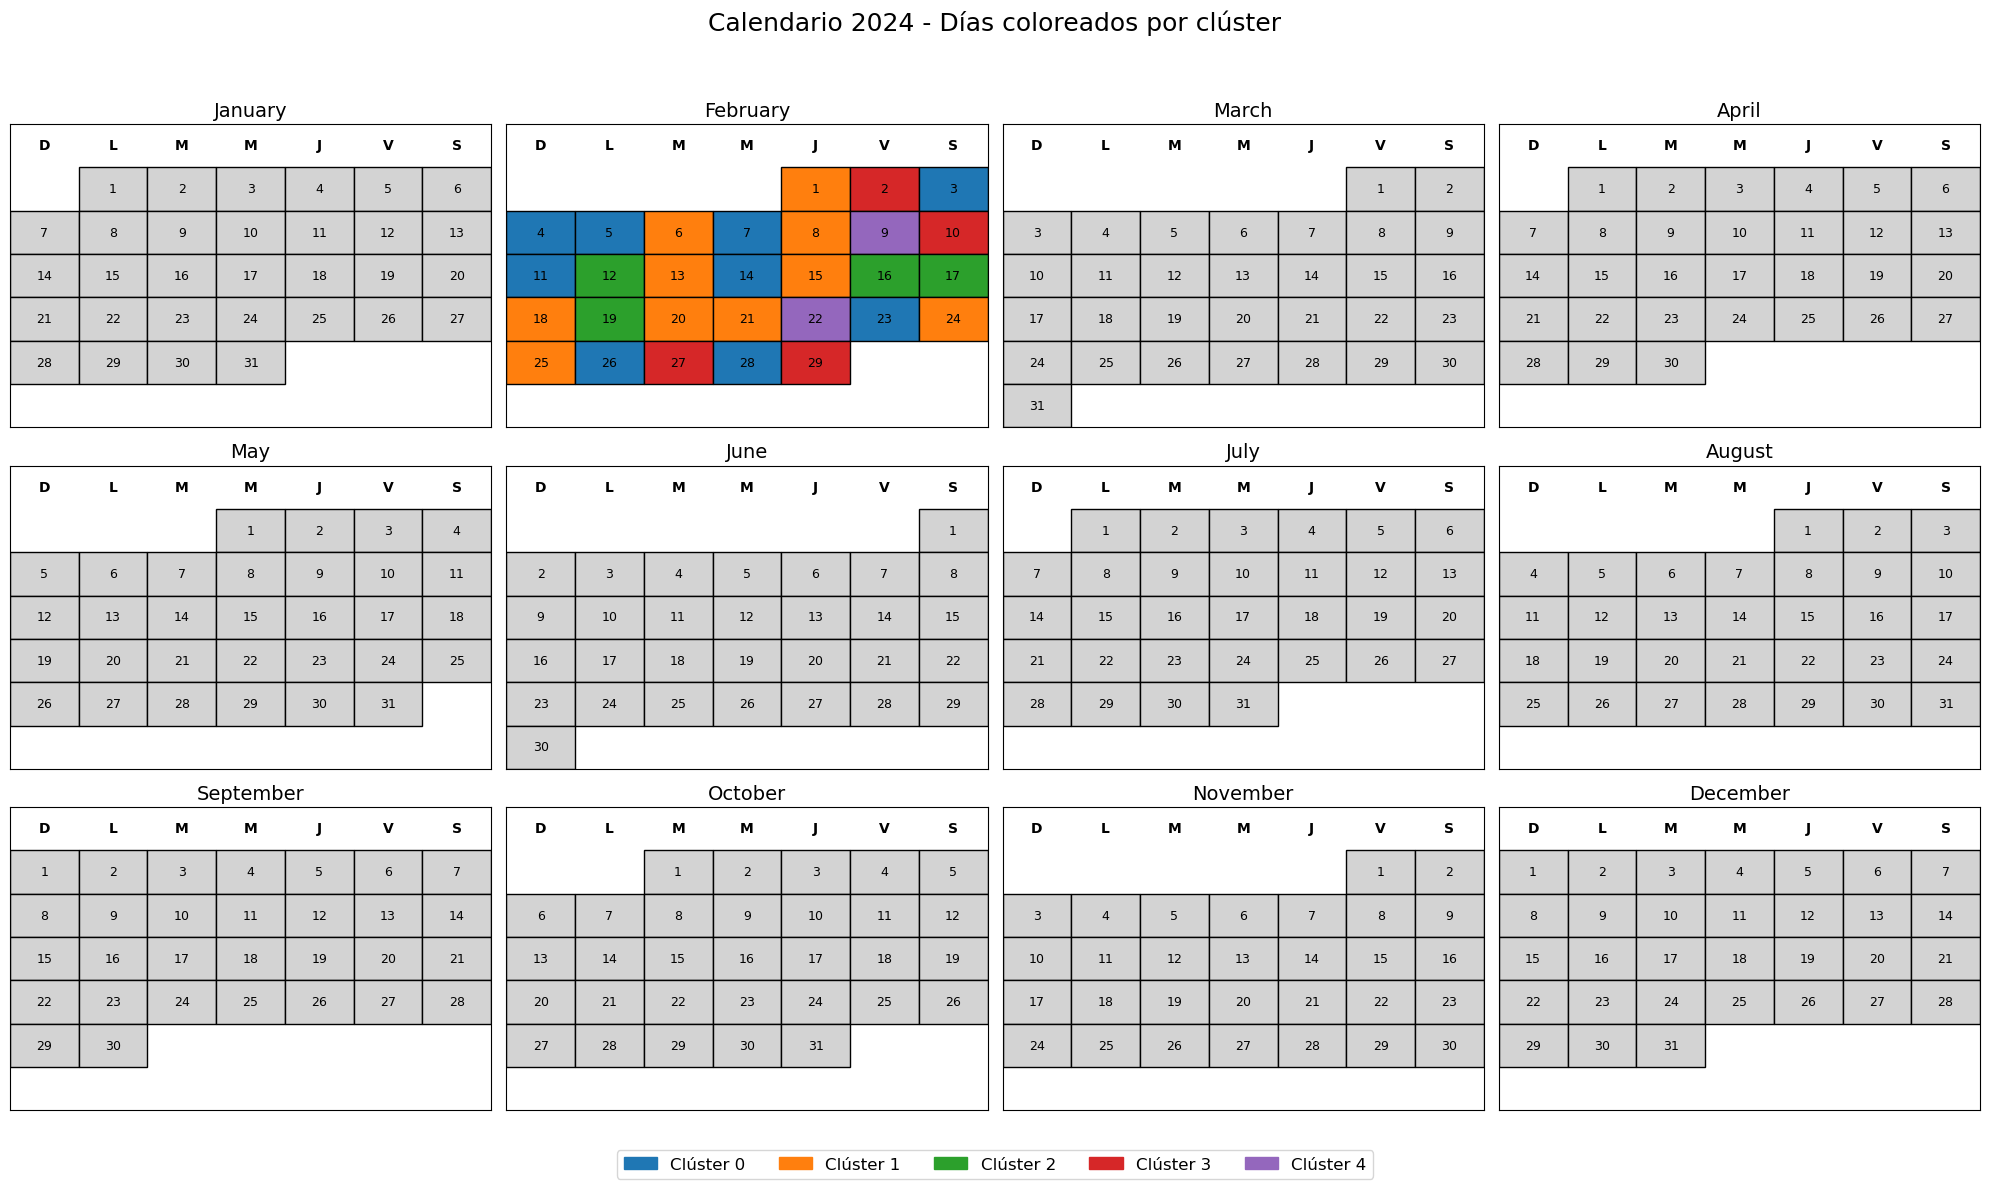

In [10]:
labels_mibici_2024_5 = np.load('vector_files/kernel_kmeans_results/labels_mibici_2024_5.npy')
plot_calendar_clusters_np(dates_mibici_2024, labels_mibici_2024_5, 2024, cmap='tab10')

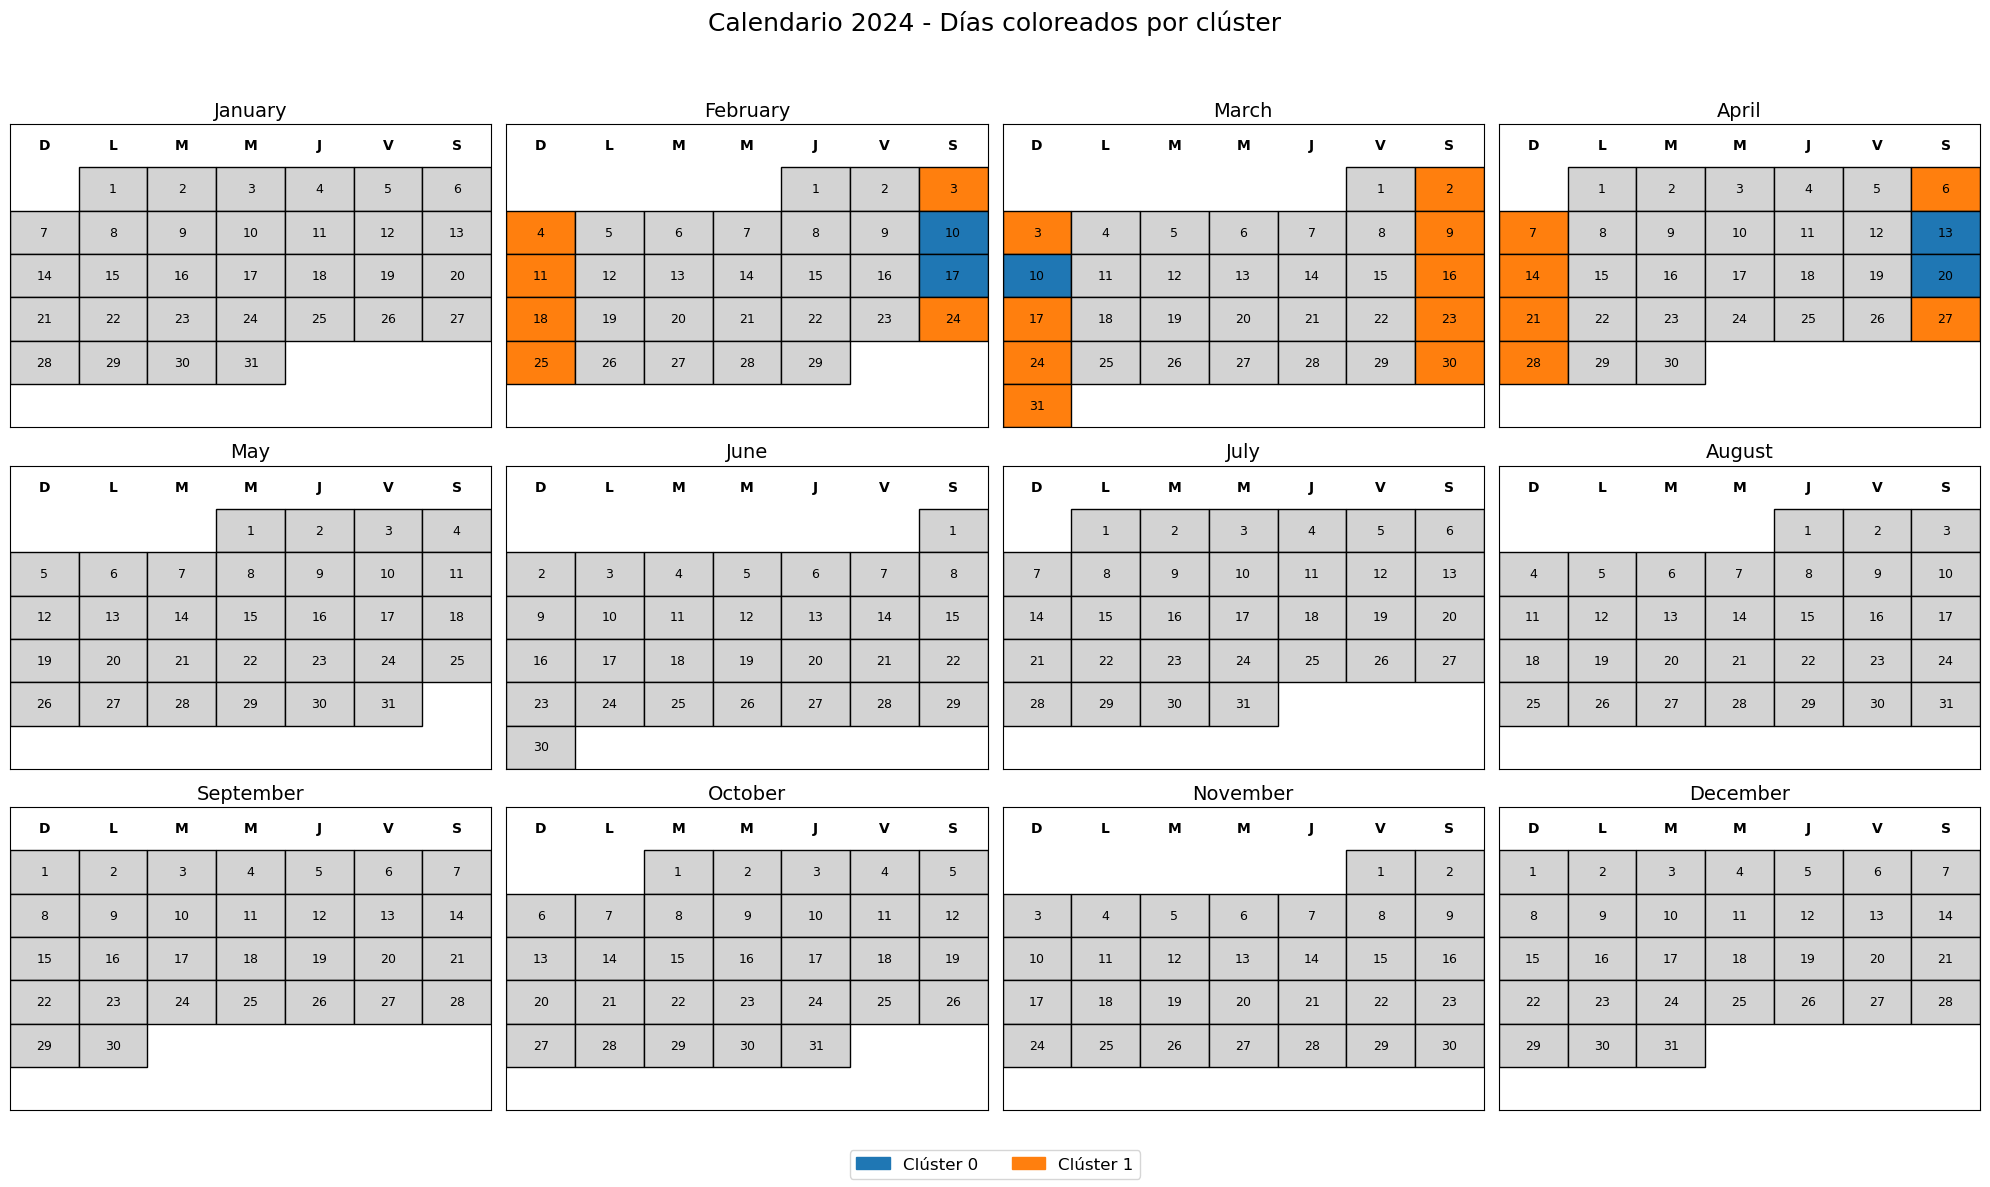

In [11]:
dates_weekends = np.load('vector_files/kernel_kmeans_results/dates_weekends.npy')
labels_weekends_2 = np.load('vector_files/kernel_kmeans_results/labels_weekends_2.npy')
plot_calendar_clusters_np(dates_weekends, labels_weekends_2, 2024, cmap='tab10')

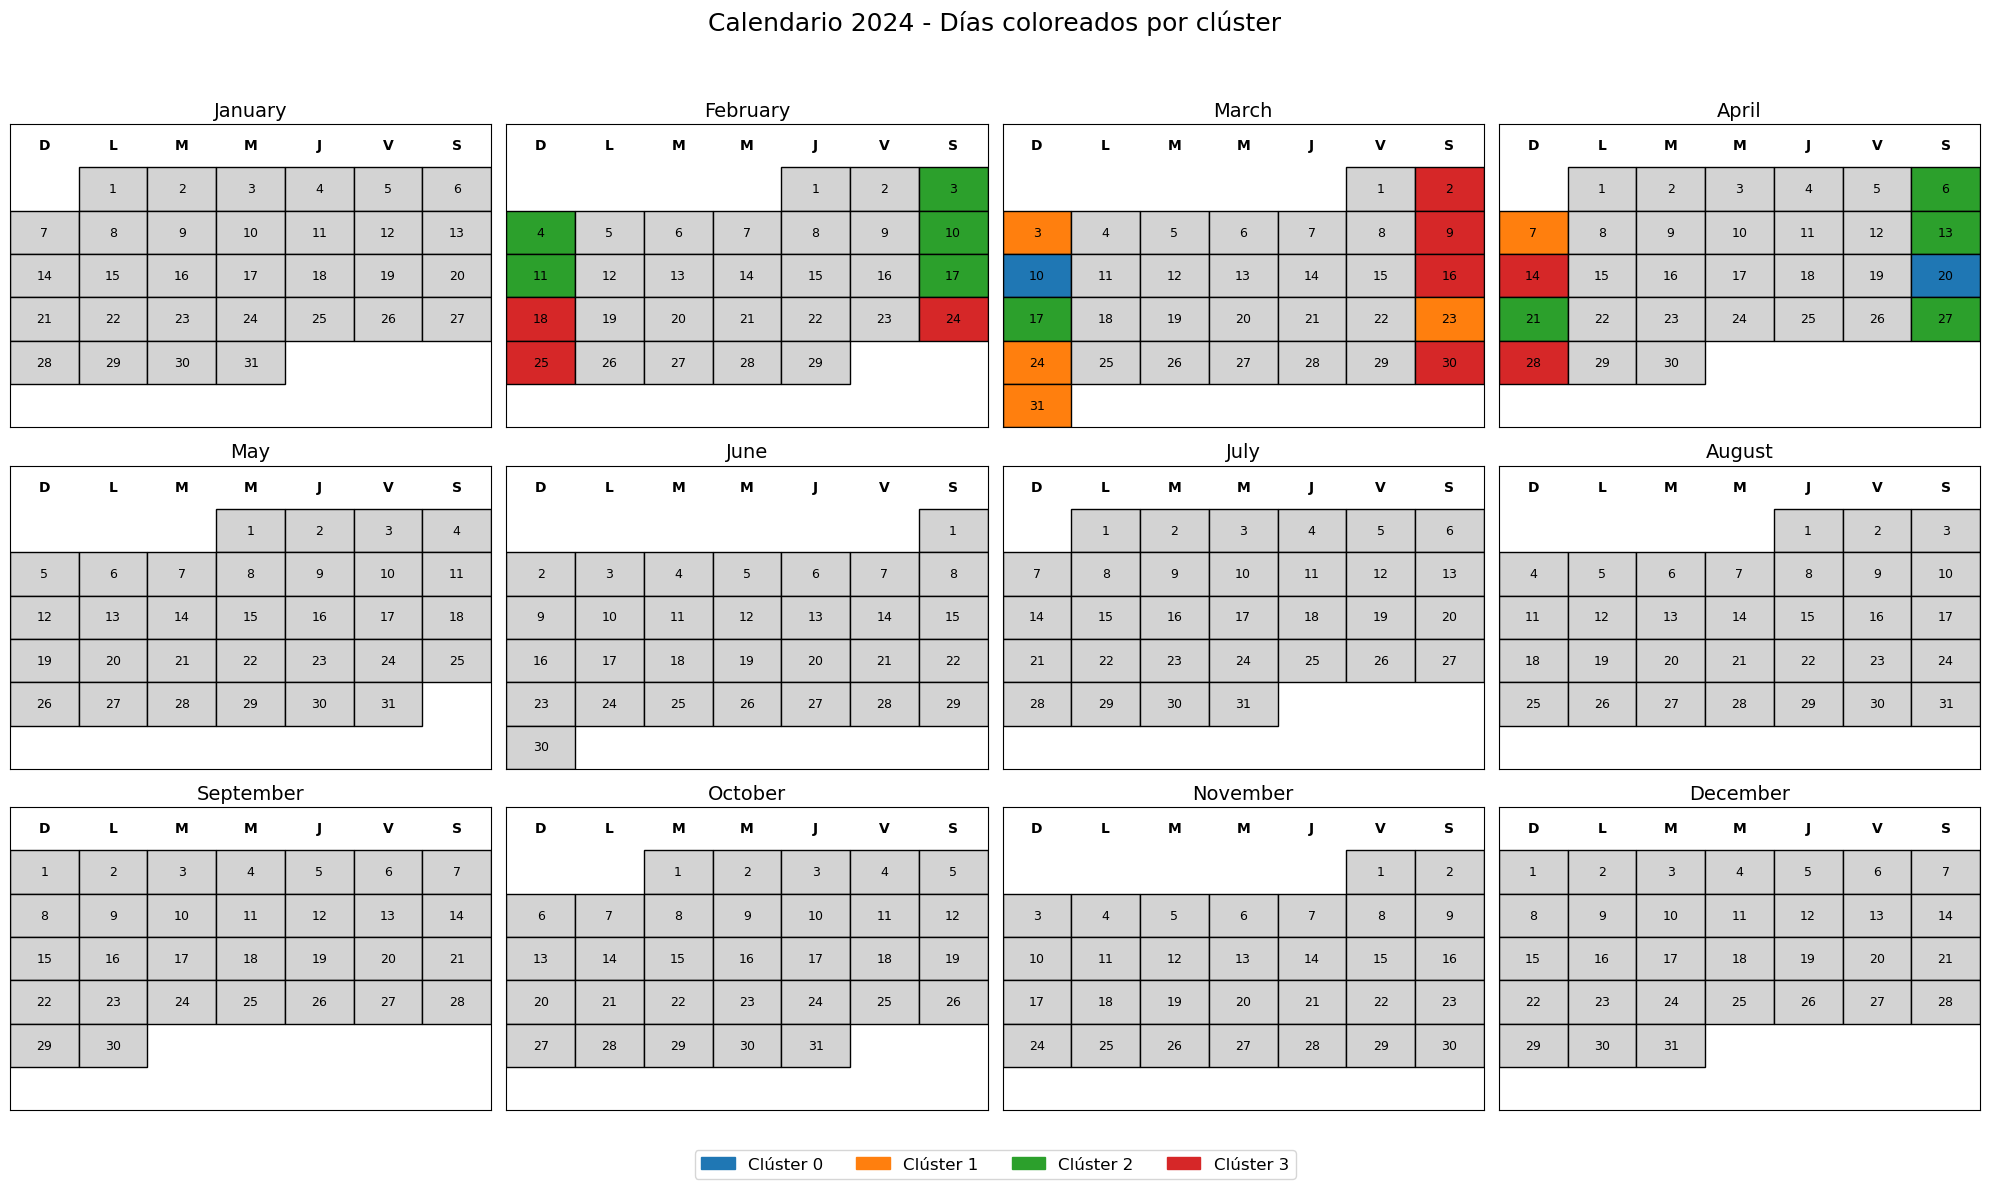

In [12]:
labels_weekends_4 = np.load('vector_files/kernel_kmeans_results/labels_weekends_4.npy')
plot_calendar_clusters_np(dates_weekends, labels_weekends_4, 2024, cmap='tab10')

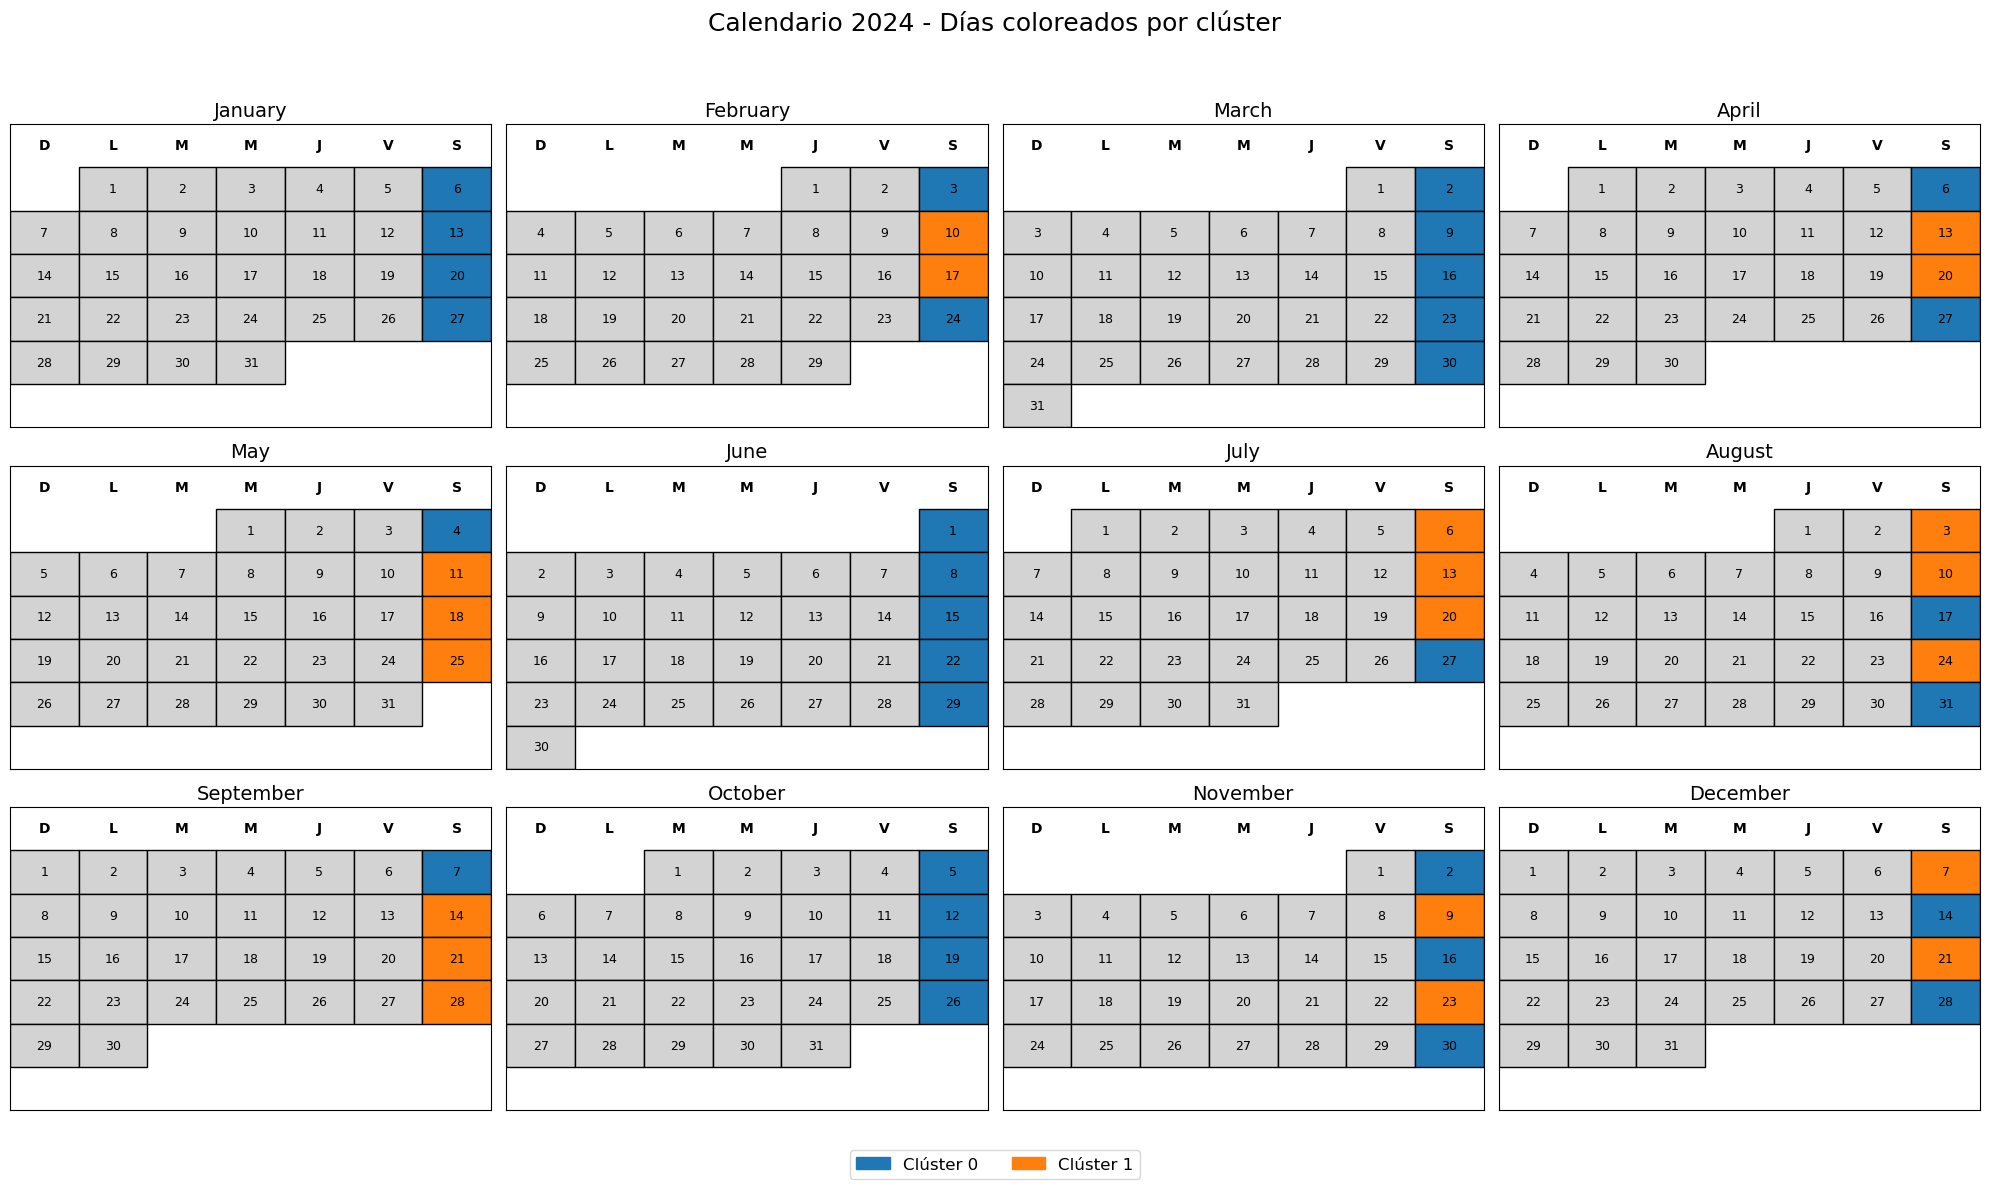

In [13]:
dates_saturdays_2024 = np.load('vector_files/kernel_kmeans_results/dates_saturdays_2024.npy')
labels_saturdays_2024_2 = np.load('vector_files/kernel_kmeans_results/labels_saturdays_2.npy')
plot_calendar_clusters_np(dates_saturdays_2024, labels_saturdays_2024_2, 2024, cmap='tab10')

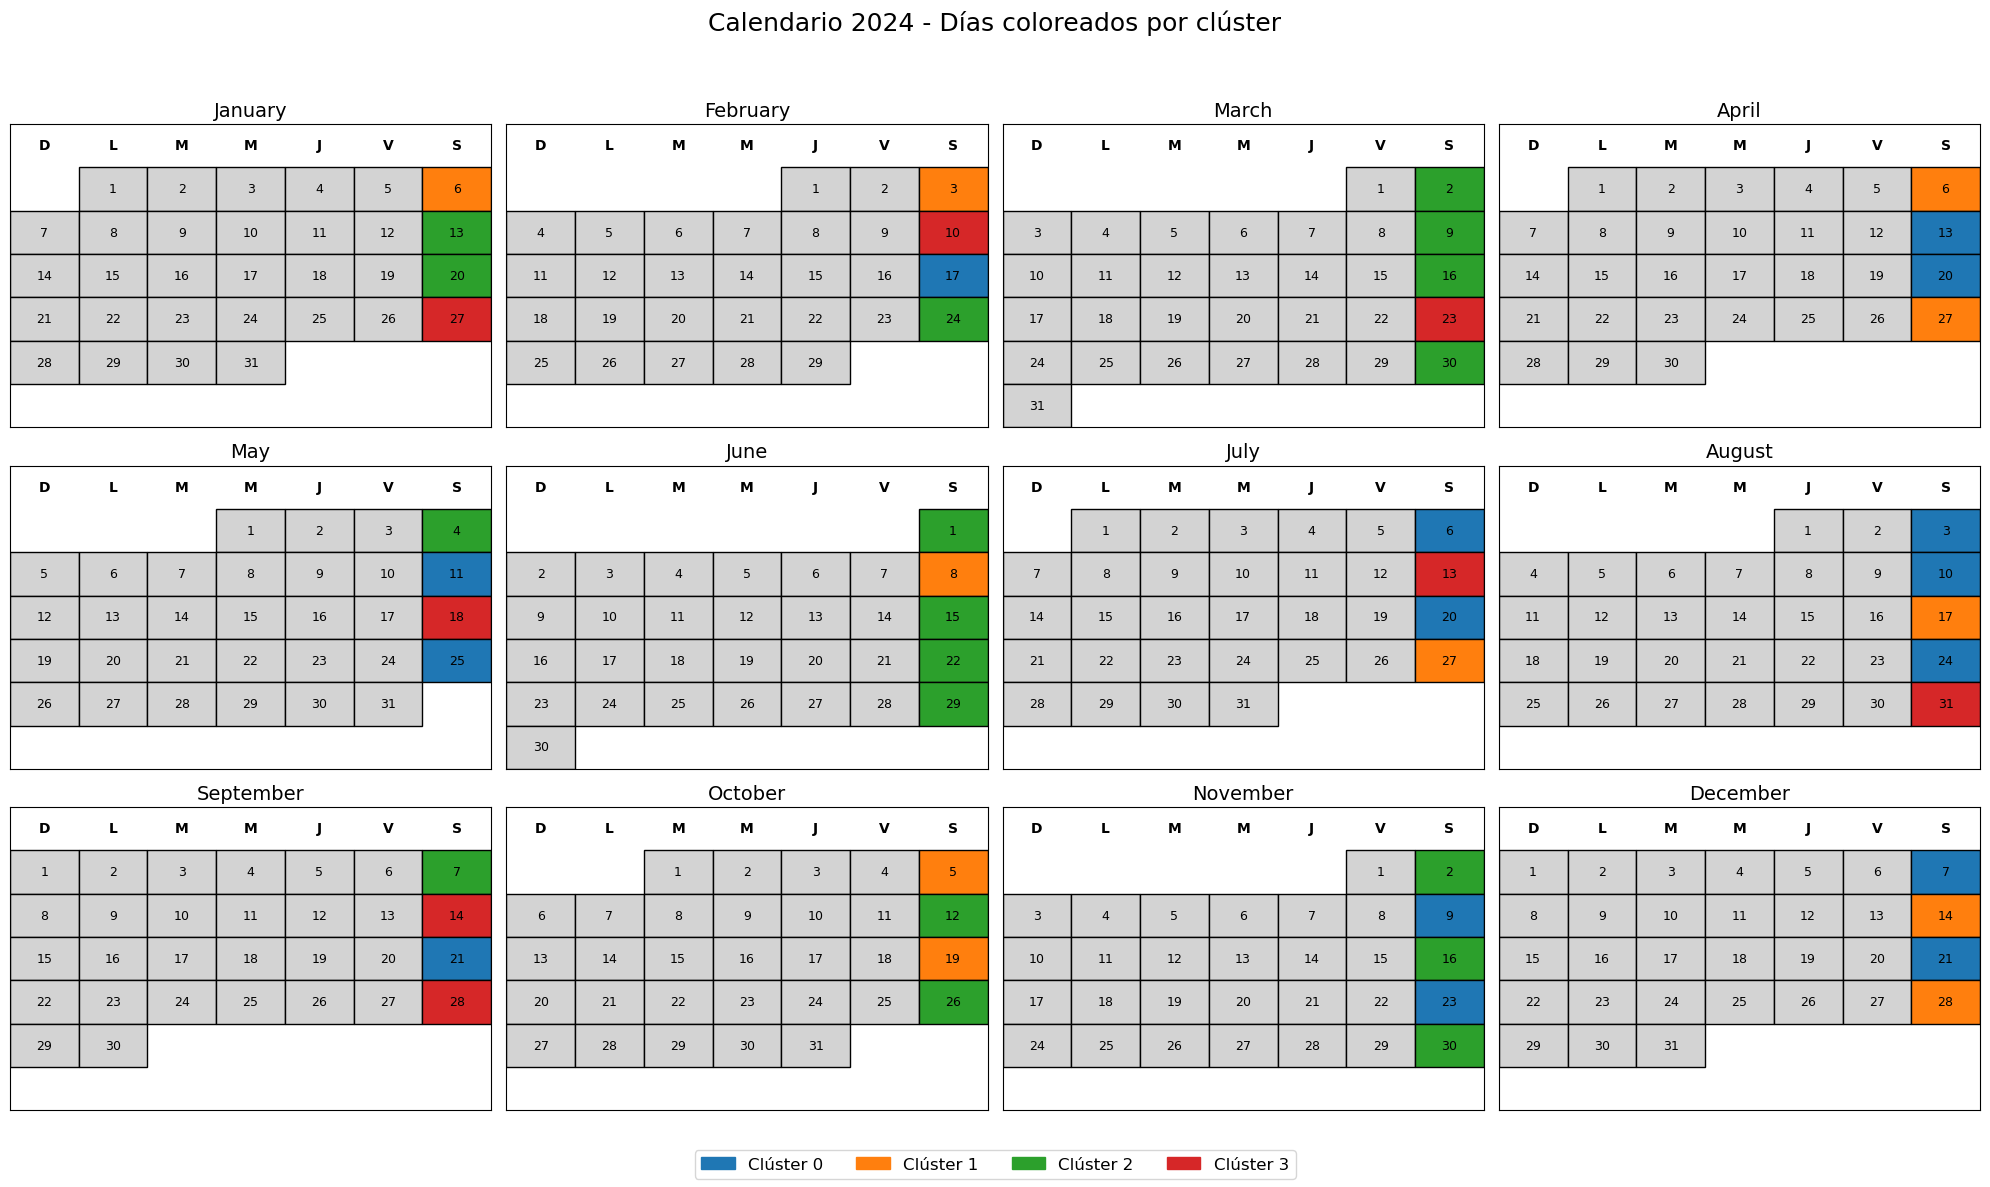

In [14]:
labels_saturdays_4 = np.load('vector_files/kernel_kmeans_results/labels_saturdays_4.npy')
plot_calendar_clusters_np(dates_saturdays_2024, labels_saturdays_4, 2024, cmap='tab10')

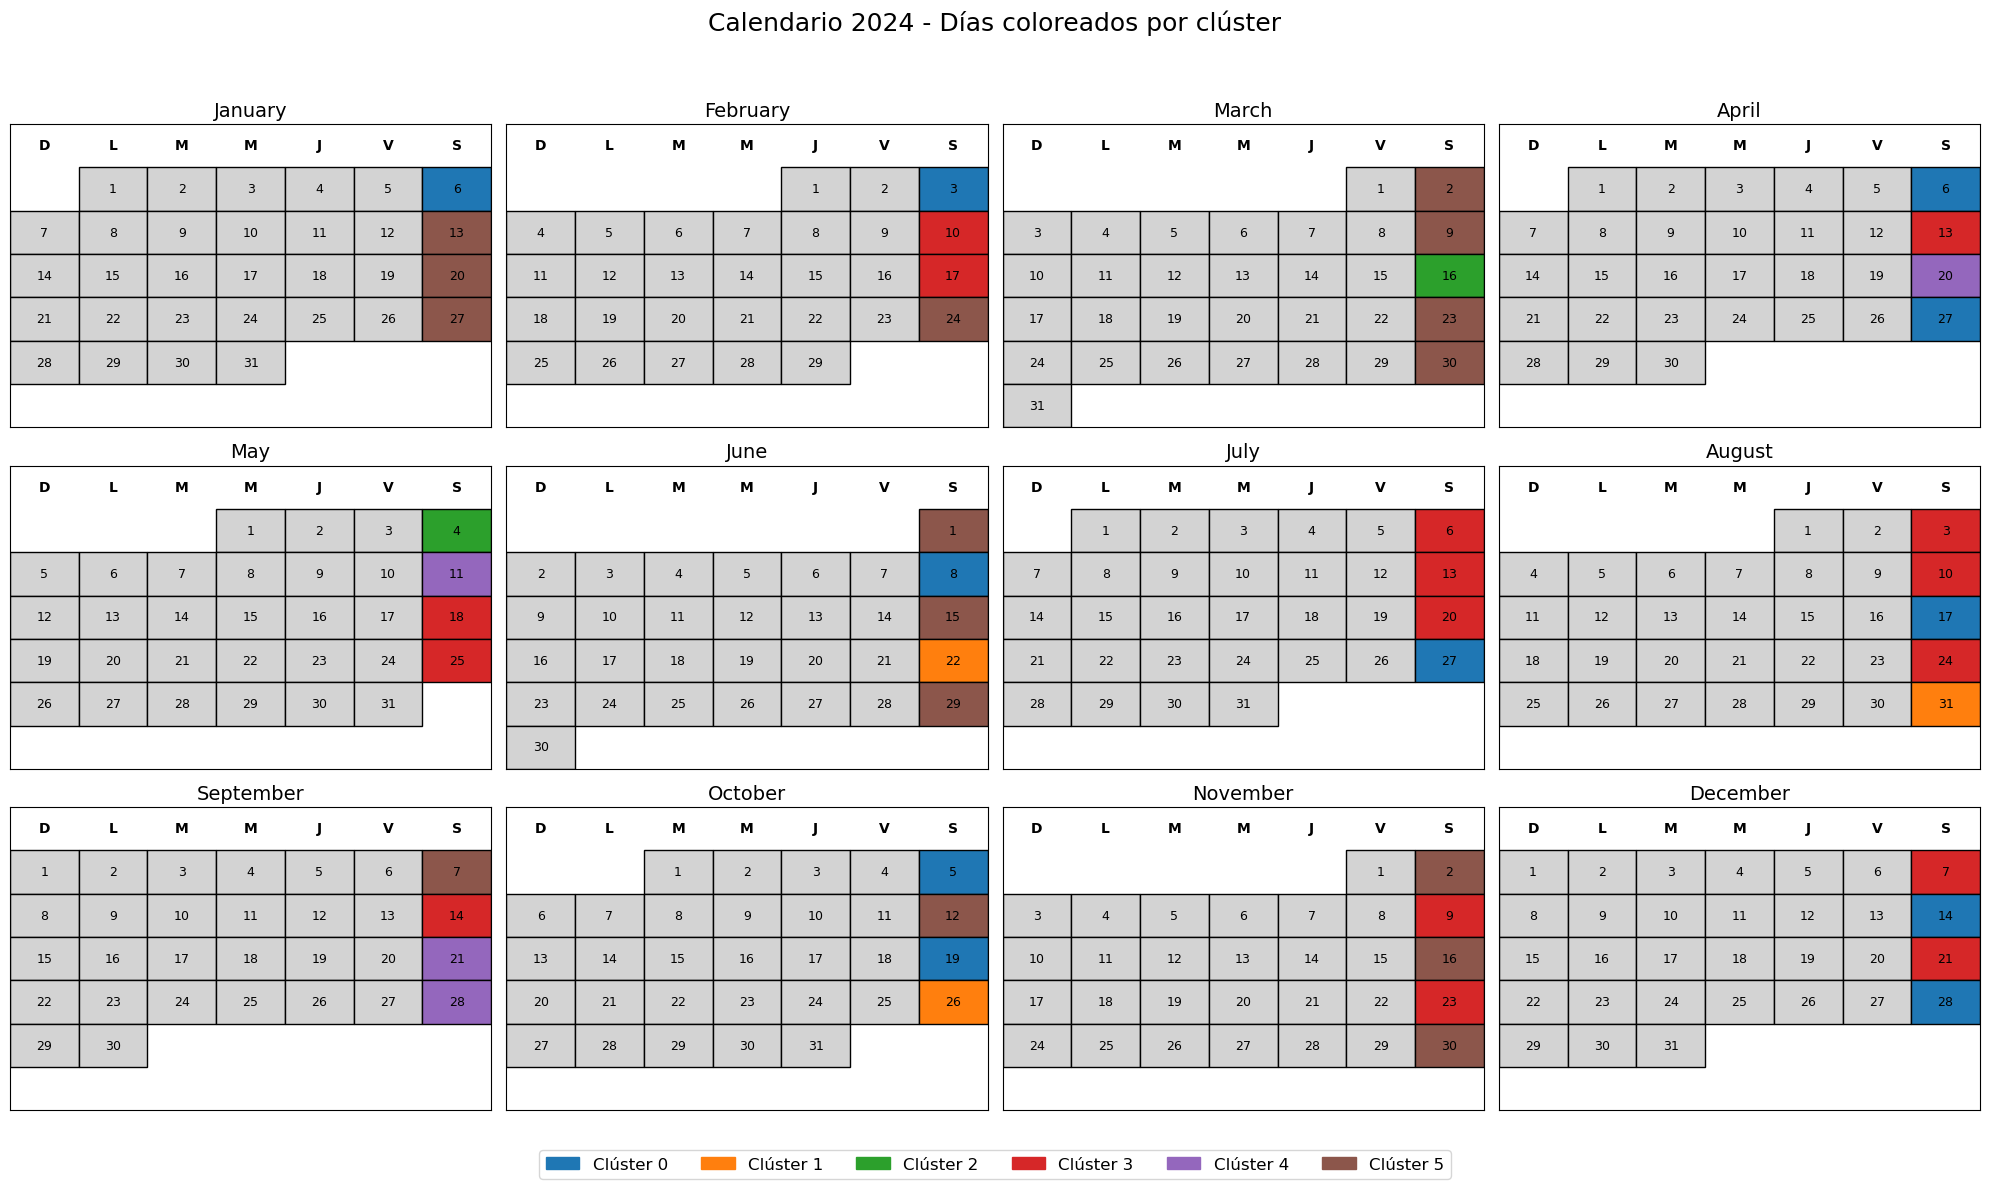

In [15]:
labels_saturdays_6 = np.load('vector_files/kernel_kmeans_results/labels_saturdays_6.npy')
plot_calendar_clusters_np(dates_saturdays_2024, labels_saturdays_6, 2024, cmap='tab10')

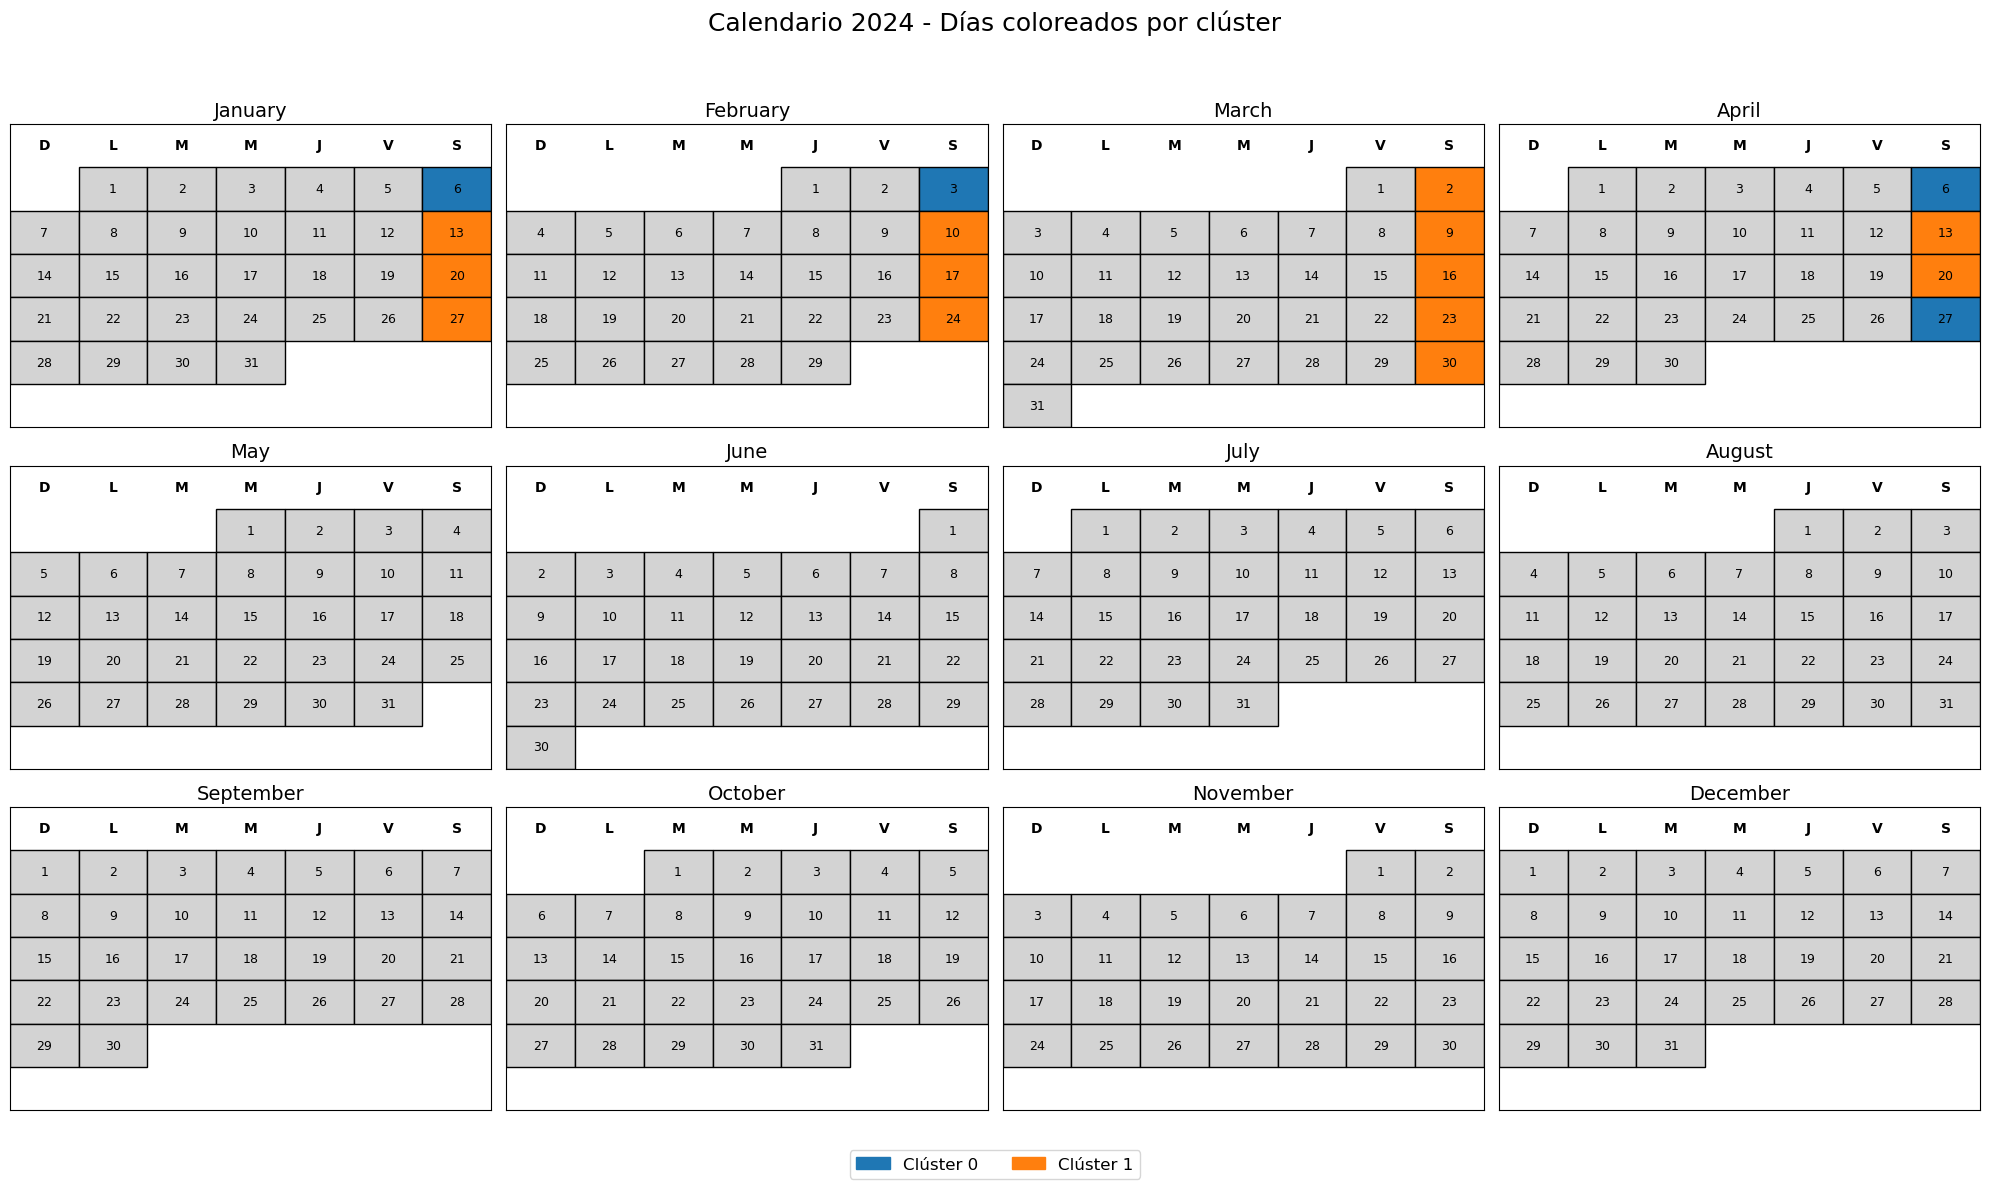

In [16]:
dates_saturdays_4m_2024 = np.load('vector_files/kernel_kmeans_results/dates_saturdays_4m_2024.npy')
labels_saturdays_2024_2 = np.load('vector_files/kernel_kmeans_results/labels_saturdays_4m_2.npy')
plot_calendar_clusters_np(dates_saturdays_4m_2024, labels_saturdays_2024_2, 2024, cmap='tab10')

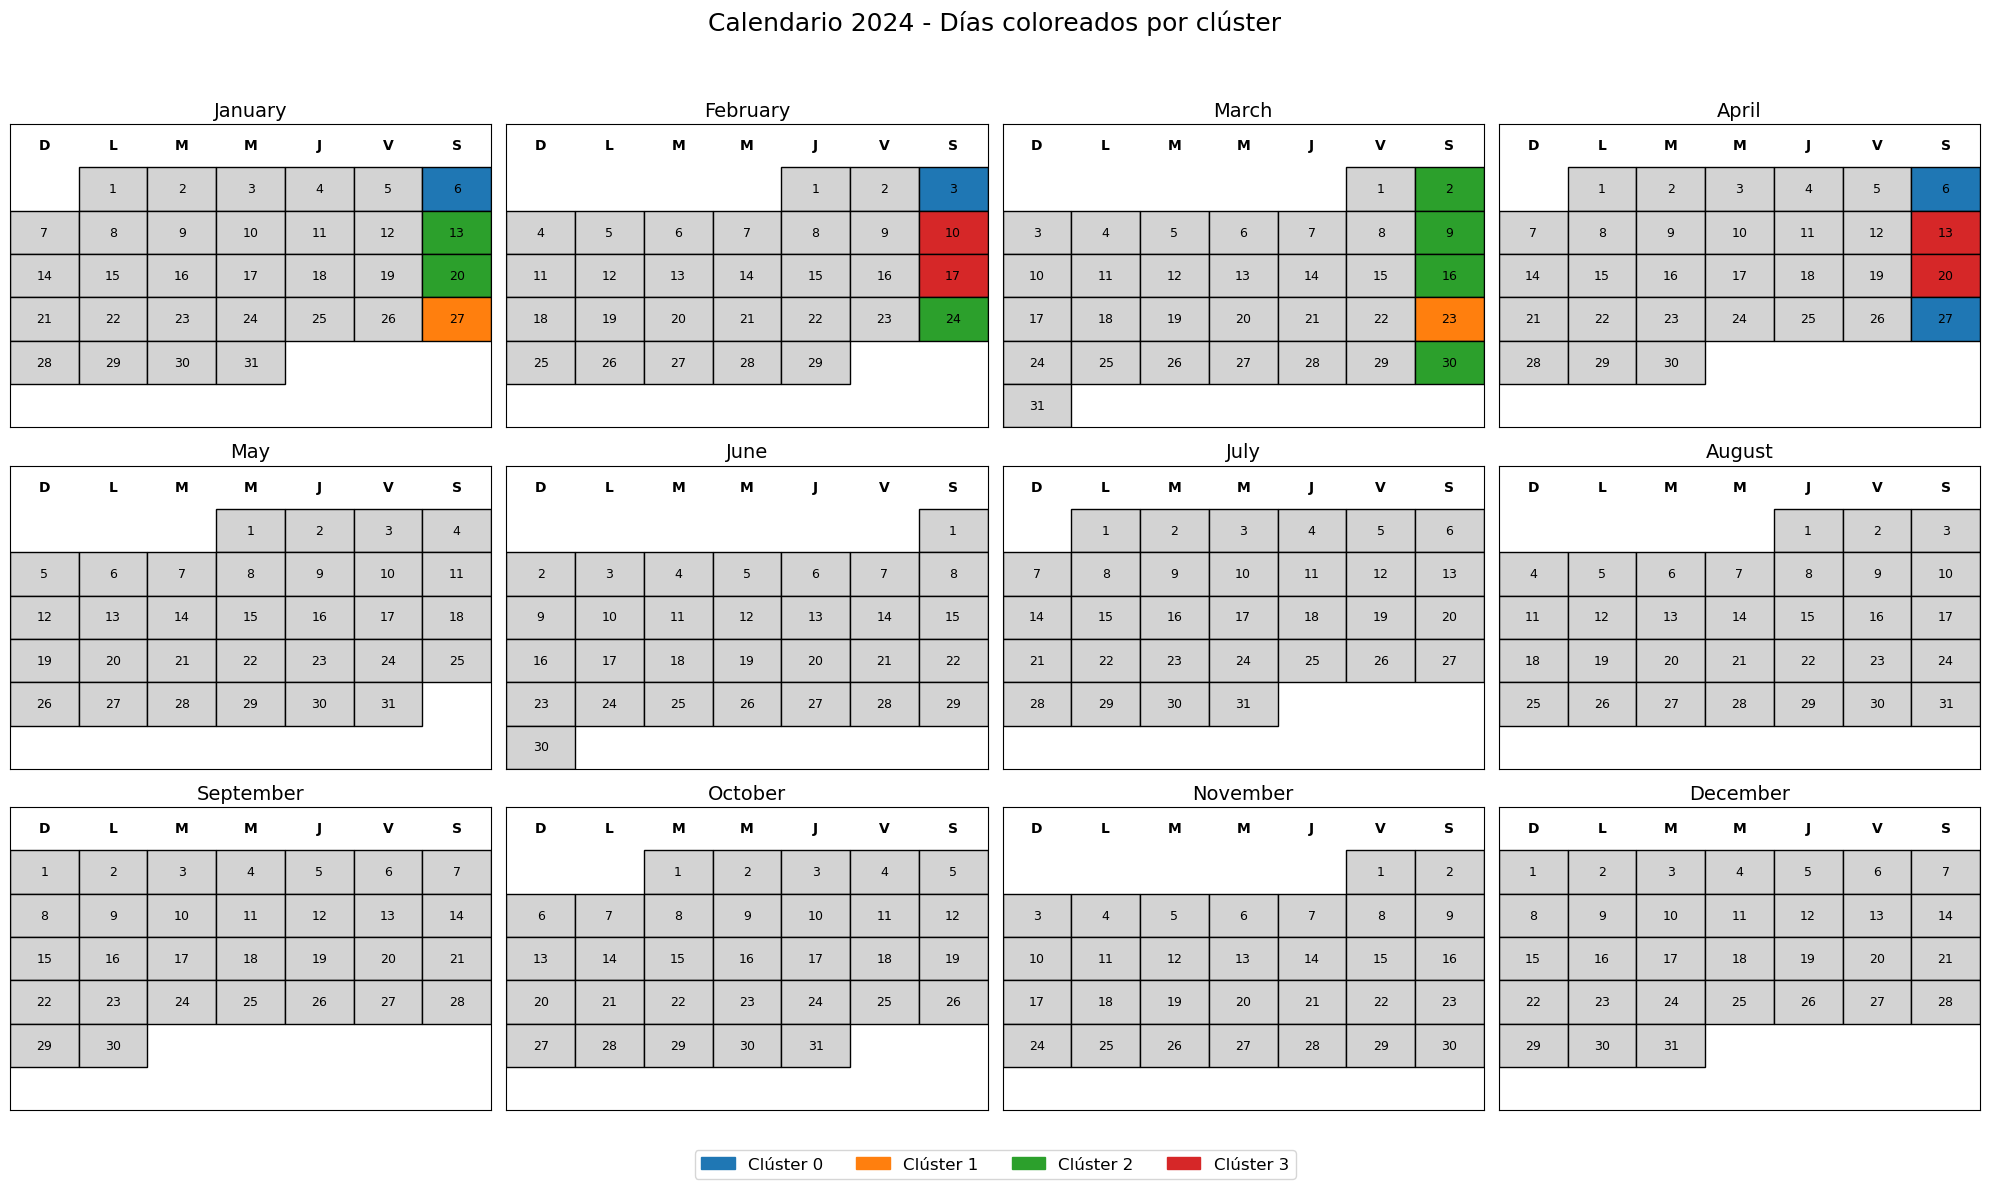

In [17]:
labels_saturdays_4m_4 = np.load('vector_files/kernel_kmeans_results/labels_saturdays_4m_4.npy')
plot_calendar_clusters_np(dates_saturdays_4m_2024, labels_saturdays_4m_4, 2024, cmap='tab10')

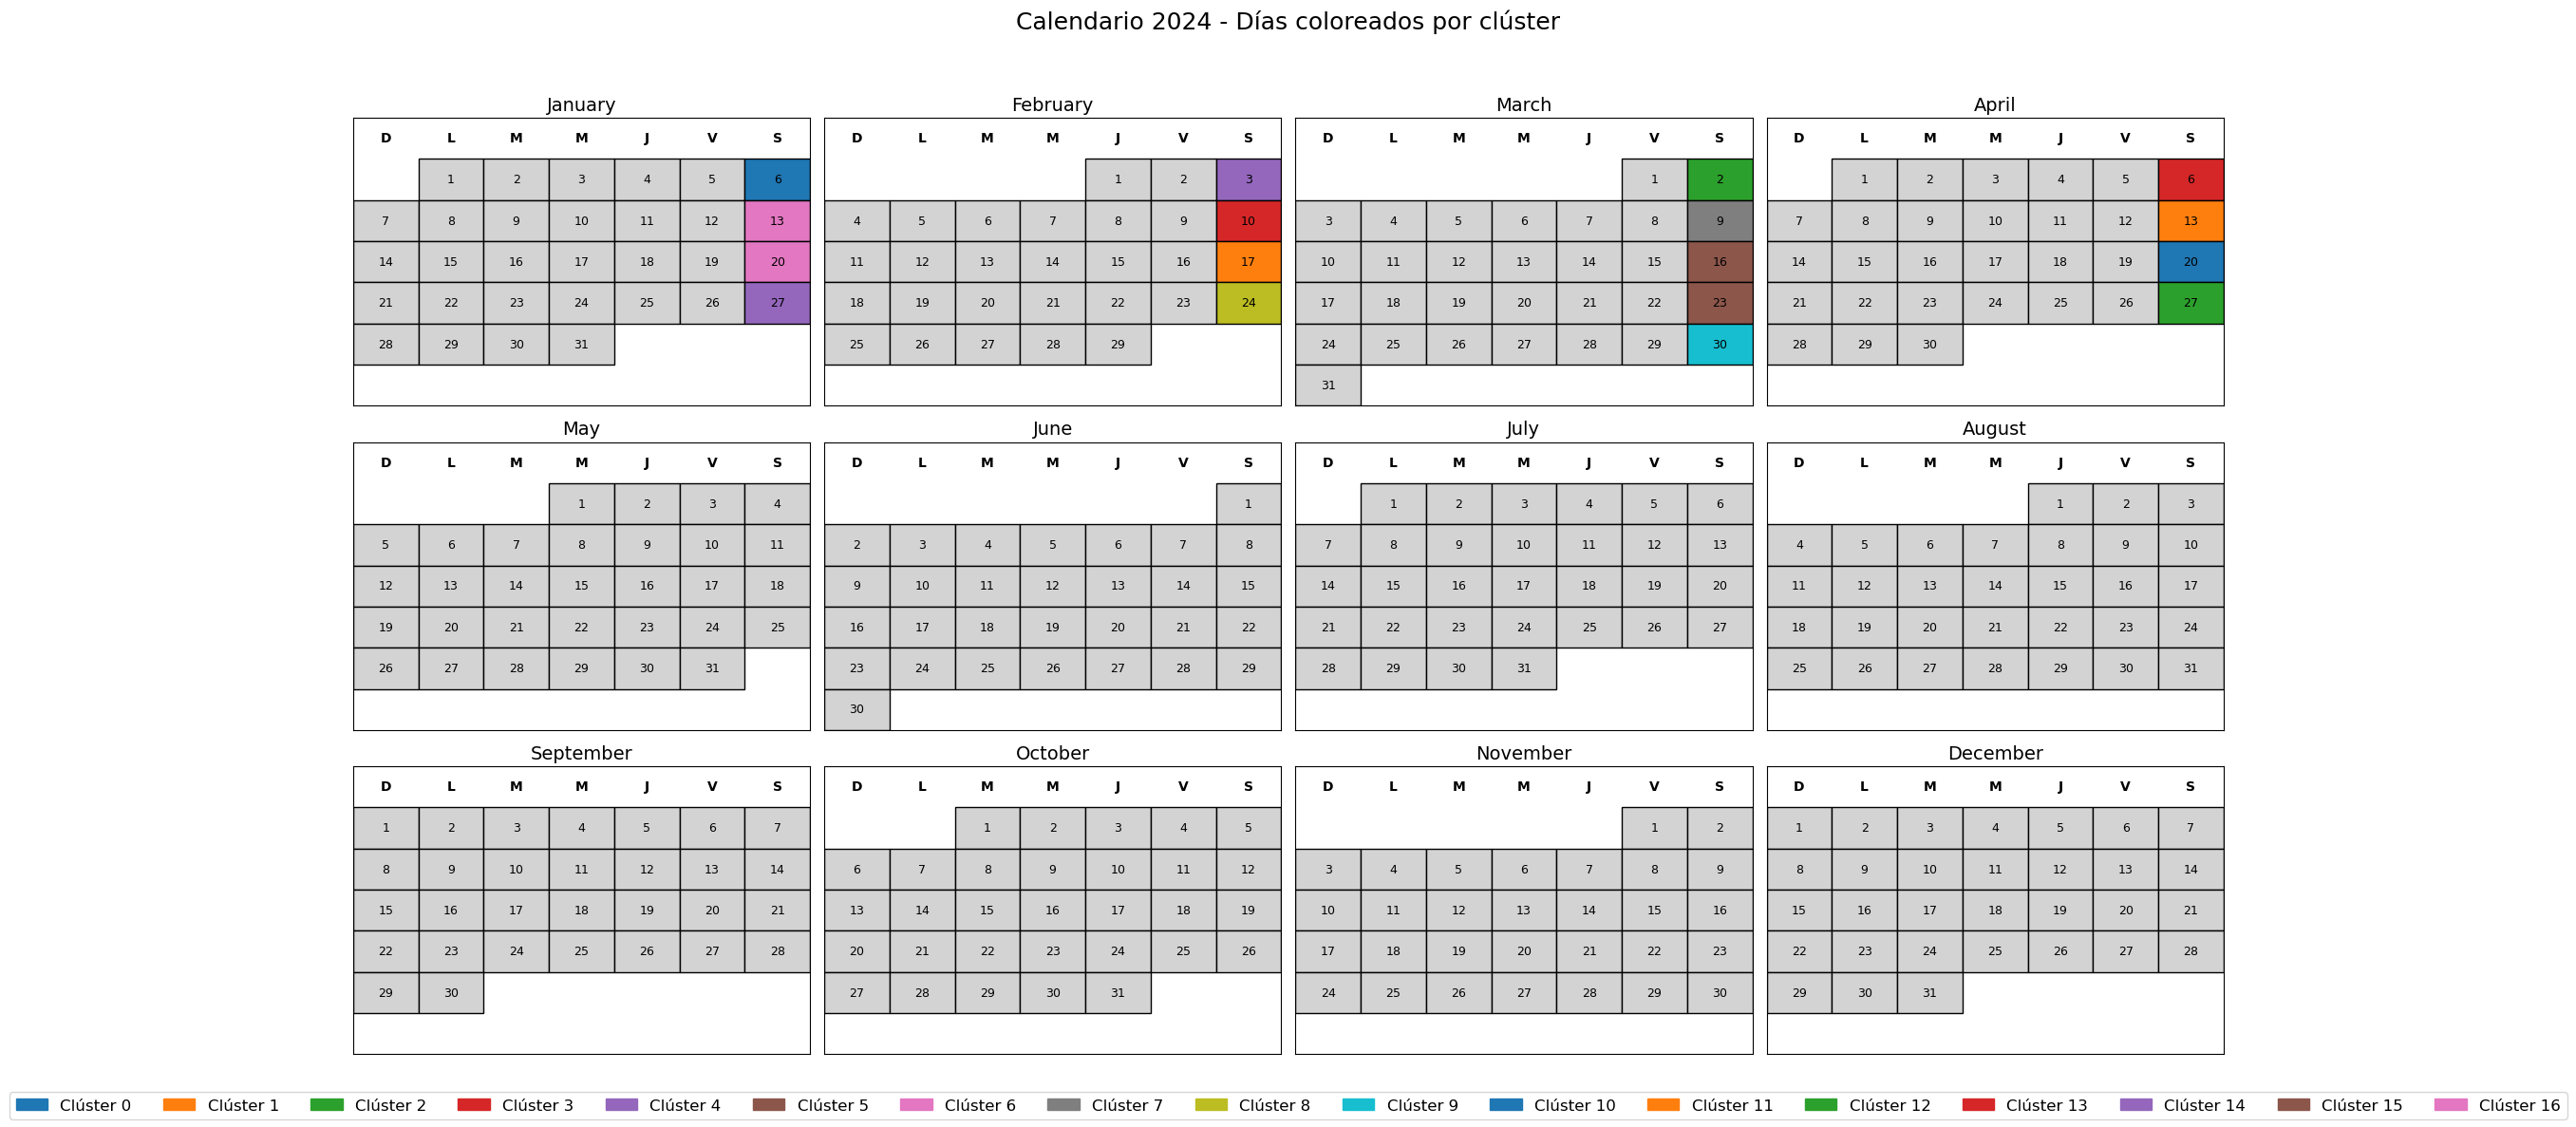

In [18]:
labels_saturdays_4m_17 = np.load('vector_files/kernel_kmeans_results/labels_saturdays_4m_17.npy')
plot_calendar_clusters_np(dates_saturdays_4m_2024, labels_saturdays_4m_17, 2024, cmap='tab10')

In [19]:
labels_saturdays_4m_17

array([ 9,  0, 12, 11,  3,  2,  1,  5, 16,  7,  4,  6, 10, 15, 14,  8, 13])